# IMDB CAPSTONE PROJECT

# Phase 3

Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.

# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA



# IMPORTING CSV FILES

In [2]:
df = pd.read_csv('D:\Datatrained\Dataset 1.csv')

df1 = pd.read_csv("D:\Datatrained\Dataset 1.csv")

In [3]:
df.head()

,Movie Name,Director Name,Duration,Year,Rating,Metascore
0,The Dark Knight,Christopher Nolan,152 min,2008,9.0,84.0
1,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,2003,9.0,94.0
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140 min,2023,8.9,86.0
3,Inception,Christopher Nolan,148 min,2010,8.8,74.0
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,2001,8.8,92.0


In [4]:
df1.head()

,Movie Name,Votes,Gross Collection,Certification,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3
0,The Dark Knight,2744939,$534.86M,12A,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,The Lord of the Rings: The Return of the King,1900488,$377.85M,12A,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,Spider-Man: Across the Spider-Verse,189649,NaN,PG,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Animation,Action,Adventure
3,Inception,2435954,$292.58M,12A,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,1928870,$315.54M,PG,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama


# JOINING CSV FILES

In [5]:
# Read the data from both files
df = pd.read_csv('D:\Datatrained\Dataset 1.csv')
df1 = pd.read_csv('D:\Datatrained\Dataset 1.csv')

# Merge the two DataFrames on the 'Movie Name' column
merged_df = pd.merge(df, df1, on='Movie Name')

# Display the merged DataFrame
print(merged_df)

                                             Movie Name       Director Name  \
0                                       The Dark Knight   Christopher Nolan   
1         The Lord of the Rings: The Return of the King       Peter Jackson   
2                   Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
3                                             Inception   Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   
...                                                 ...                 ...   
1835                                              Radhe         Prabhu Deva   
1836                                             Race 3        Remo D'Souza   
1837                                  Angels Apocalypse           Sean Cain   
1838                              The Cost of Deception       Keith English   
1839                                            Sadak 2        Mahesh Bhatt   

     Duration  Year  Rating  Metascore    Votes Gro

In [6]:
merged_df.head()

,Movie Name,Director Name,Duration,Year,Rating,Metascore,Votes,Gross Collection,Certification,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3
0,The Dark Knight,Christopher Nolan,152 min,2008,9.0,84.0,2744939,$534.86M,12A,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,2003,9.0,94.0,1900488,$377.85M,12A,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140 min,2023,8.9,86.0,189649,NaN,PG,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Animation,Action,Adventure
3,Inception,Christopher Nolan,148 min,2010,8.8,74.0,2435954,$292.58M,12A,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,2001,8.8,92.0,1928870,$315.54M,PG,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama


In [7]:
merged_df.to_csv("D:\Datatrained\Merged Dataset.csv", index=False)

# EDA: Exploratory Data Analysis

In [8]:
# Overview of the DataFrame
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 0 to 1839
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie Name        1840 non-null   object 
 1   Director Name     1840 non-null   object 
 2   Duration          1840 non-null   object 
 3   Year              1840 non-null   object 
 4   Rating            1840 non-null   float64
 5   Metascore         1648 non-null   float64
 6   Votes             1840 non-null   int64  
 7   Gross Collection  1539 non-null   object 
 8   Certification     1826 non-null   object 
 9   Star1             1839 non-null   object 
 10  Star2             1839 non-null   object 
 11  Star3             1839 non-null   object 
 12  Star4             1838 non-null   object 
 13  Genre1            1840 non-null   object 
 14  Genre2            1839 non-null   object 
 15  Genre3            1690 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory

**Convert 'Gross Collection' column to numeric**

In [9]:
import pandas as pd

# Assuming you already have the DataFrame merged_df

# Function to convert Gross Collection to millions
def convert_to_millions(gross_str):
    if isinstance(gross_str, str) and gross_str.endswith('M'):
        return float(gross_str.replace('$', '').replace('M', '')) * 1e6
    return pd.NA

# Convert 'Gross Collection' column to millions without the '$' sign
merged_df['Gross Collection'] = merged_df['Gross Collection'].apply(convert_to_millions)

# Convert 'Gross Collection' column to numeric type
merged_df['Gross Collection'] = pd.to_numeric(merged_df['Gross Collection'])

# Check data types of columns in the DataFrame after conversion
data_types = merged_df.dtypes
print(data_types)


Movie Name           object
Director Name        object
Duration             object
Year                 object
Rating              float64
Metascore           float64
Votes                 int64
Gross Collection    float64
Certification        object
Star1                object
Star2                object
Star3                object
Star4                object
Genre1               object
Genre2               object
Genre3               object
dtype: object


**Convert 'Duration' column to numeric**

In [10]:
# Convert 'Duration' column to numeric
merged_df['Duration'] = merged_df['Duration'].apply(lambda x: int(x.split()[0]))


In [11]:
merged_df

,Movie Name,Director Name,Duration,Year,Rating,Metascore,Votes,Gross Collection,Certification,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3
0,The Dark Knight,Christopher Nolan,152,2008,9.0,84.0,2744939,534860000.0,12A,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,94.0,1900488,377850000.0,12A,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140,2023,8.9,86.0,189649,NaN,PG,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Animation,Action,Adventure
3,Inception,Christopher Nolan,148,2010,8.8,74.0,2435954,292580000.0,12A,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,92.0,1928870,315540000.0,PG,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,Radhe,Prabhu Deva,113,2021,1.9,NaN,179070,NaN,15,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller
1836,Race 3,Remo D'Souza,160,2018,1.9,NaN,47824,1690000.0,12A,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller
1837,Angels Apocalypse,Sean Cain,85,2015,1.6,NaN,42919,NaN,NaN,Enzo Zelocchi,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,Action,Fantasy,Sci-Fi
1838,The Cost of Deception,Keith English,125,2021,1.5,NaN,39602,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama


In [12]:
# Summary statistics of numerical columns
print(merged_df.describe())

          Duration       Rating    Metascore         Votes  Gross Collection
count  1840.000000  1840.000000  1648.000000  1.840000e+03      1.539000e+03
mean    115.331522     6.474022    53.308859  1.803527e+05      7.633255e+07
std      21.577809     0.998797    16.277381  2.346515e+05      1.014874e+08
min      45.000000     1.200000     9.000000  2.501900e+04      0.000000e+00
25%     100.000000     5.900000    41.000000  4.752650e+04      1.832500e+07
50%     111.500000     6.500000    53.000000  9.614850e+04      4.275000e+07
75%     126.000000     7.100000    65.000000  2.129115e+05      9.401500e+07
max     321.000000     9.000000    98.000000  2.744939e+06      9.366600e+08


**Number of rows and columns**

In [13]:
print(merged_df.shape)

(1840, 16)


**Checking the missing values**

In [14]:
print(merged_df.isnull().sum())

Movie Name            0
Director Name         0
Duration              0
Year                  0
Rating                0
Metascore           192
Votes                 0
Gross Collection    301
Certification        14
Star1                 1
Star2                 1
Star3                 1
Star4                 2
Genre1                0
Genre2                1
Genre3              150
dtype: int64


# FIXING MISSING VALUES

In [15]:
# Impute missing values in 'Metascore' with the mean
mean_metascore = merged_df['Metascore'].mean()
merged_df['Metascore'].fillna(mean_metascore, inplace=True)

# Impute missing values in 'Gross Collection' with the mean
mean_gross_collection = merged_df['Gross Collection'].mean()
merged_df['Gross Collection'].fillna(mean_gross_collection, inplace=True)

# Fill missing values in 'Certification' with 'N/A'
merged_df['Certification'].fillna('N/A', inplace=True)

# Fill missing values in 'Star1', 'Star2', 'Star3', 'Star4' with 'N/A'
merged_df['Star1'].fillna('N/A', inplace=True)
merged_df['Star2'].fillna('N/A', inplace=True)
merged_df['Star3'].fillna('N/A', inplace=True)
merged_df['Star4'].fillna('N/A', inplace=True)

# Fill missing values in 'Genre2', 'Genre3' with 'N/A'
merged_df['Genre2'].fillna('N/A', inplace=True)
merged_df['Genre3'].fillna('N/A', inplace=True)

# Drop rows with missing values in 'Genre1'
merged_df.dropna(subset=['Genre1'], inplace=True)

# Check the count of missing values after fixing them
missing_values_count = merged_df.isnull().sum()
print(missing_values_count)


Movie Name          0
Director Name       0
Duration            0
Year                0
Rating              0
Metascore           0
Votes               0
Gross Collection    0
Certification       0
Star1               0
Star2               0
Star3               0
Star4               0
Genre1              0
Genre2              0
Genre3              0
dtype: int64


# Comparing Gross Collection and Votes with rest of the columns. 

**The movie with the most votes**

The movie with the most votes is 'The Dark Knight' with 2744939 votes.

Top 10 movies with the most votes:
Movie Name
The Dark Knight                                      2744939
Inception                                            2435954
Godzilla                                             1978437
The Matrix                                           1972714
The Lord of the Rings: The Fellowship of the Ring    1928870
The Lord of the Rings: The Return of the King        1900488
The Dark Knight Rises                                1756350
Dune                                                 1724994
The Lord of the Rings: The Two Towers                1715100
Gladiator                                            1547408
Name: Votes, dtype: int64


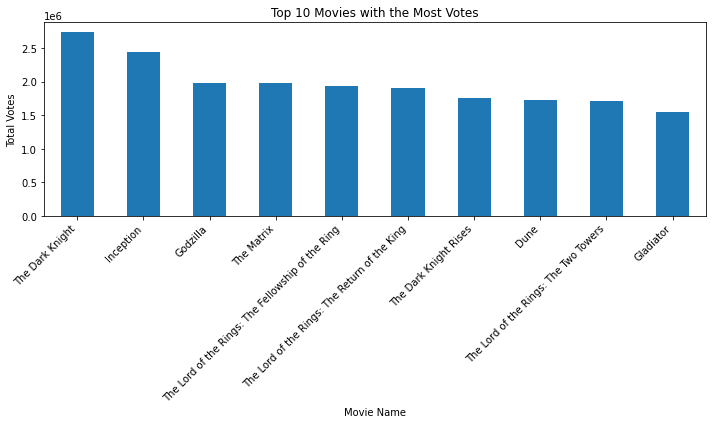

In [16]:
# Find the movie with the most votes and the corresponding number of votes
movie_with_most_votes = merged_df.loc[merged_df['Votes'].idxmax(), 'Movie Name']
most_votes = merged_df['Votes'].max()
print(f"The movie with the most votes is '{movie_with_most_votes}' with {most_votes} votes.")

# Group by 'Movie Name' and sum the 'Votes' for each movie
movie_votes = merged_df.groupby('Movie Name')['Votes'].sum()

# Sort the movies based on their total votes in descending order
movie_votes_sorted = movie_votes.sort_values(ascending=False)

# Display the top 10 movies with the most votes
top_10_movies = movie_votes_sorted.head(10)
print("\nTop 10 movies with the most votes:")
print(top_10_movies)

# Plotting the top 10 movies with the most votes
plt.figure(figsize=(10, 6))
top_10_movies.plot(kind='bar')
plt.xlabel('Movie Name')
plt.ylabel('Total Votes')
plt.title('Top 10 Movies with the Most Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The movie with the highest gross collection**

The movie with the highest gross collection is 'Star Wars: Episode VII - The Force Awakens' with $936660000.00.

Top 10 movies with the highest gross collection:
Movie Name
Godzilla                                      1.018230e+09
Star Wars: Episode VII - The Force Awakens    9.366600e+08
Avengers: Endgame                             8.583700e+08
Spider-Man: No Way Home                       8.047500e+08
Avatar                                        7.605100e+08
Ghostbusters                                  7.339400e+08
Top Gun: Maverick                             7.187300e+08
Black Panther                                 7.000600e+08
Avengers: Infinity War                        6.788200e+08
Avatar: The Way of Water                      6.596800e+08
Name: Gross Collection, dtype: float64


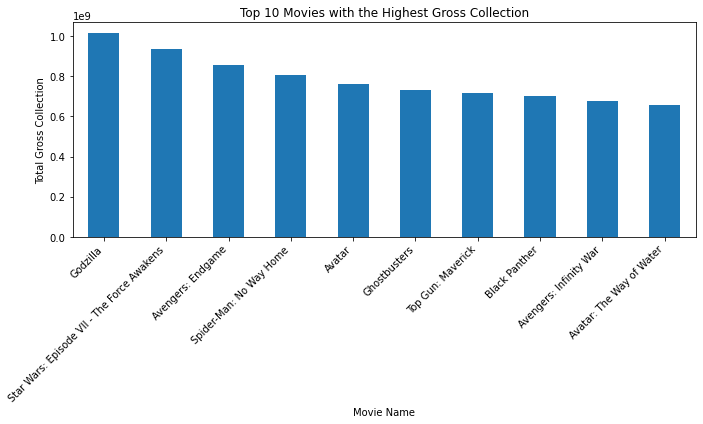

In [17]:
# Find the movie with the highest gross collection and the corresponding gross collection amount
movie_with_highest_gross = merged_df.loc[merged_df['Gross Collection'].idxmax(), 'Movie Name']
highest_gross_collection = merged_df['Gross Collection'].max()
print(f"The movie with the highest gross collection is '{movie_with_highest_gross}' with ${highest_gross_collection:.2f}.")

# Group by 'Movie Name' and sum the 'Gross Collection' for each movie
movie_gross_collection = merged_df.groupby('Movie Name')['Gross Collection'].sum()

# Sort the movies based on their total gross collection in descending order
movie_gross_collection_sorted = movie_gross_collection.sort_values(ascending=False)

# Display the top 10 movies with the highest gross collection
top_10_movies_gross = movie_gross_collection_sorted.head(10)
print("\nTop 10 movies with the highest gross collection:")
print(top_10_movies_gross)

# Plotting the top 10 movies with the highest gross collection
plt.figure(figsize=(10, 6))
top_10_movies_gross.plot(kind='bar')
plt.xlabel('Movie Name')
plt.ylabel('Total Gross Collection')
plt.title('Top 10 Movies with the Highest Gross Collection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The director with the most votes**

The director with the most votes is Christopher Nolan with 9685738.00 votes.


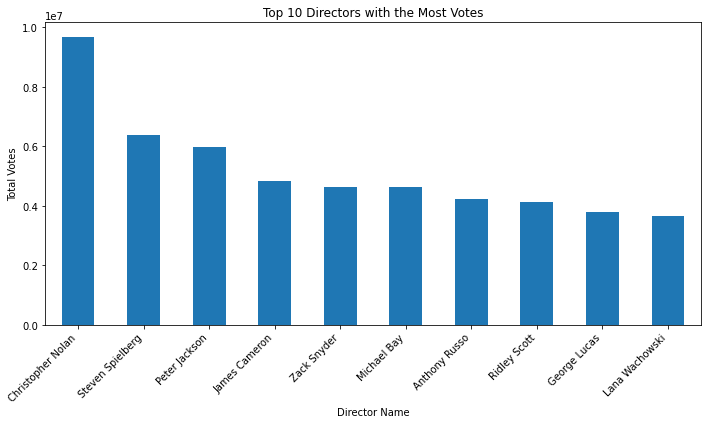

In [18]:
# Group by 'Director Name' and sum the 'Votes' for each director
director_votes = merged_df.groupby('Director Name')['Votes'].sum()

# Sort the directors based on their total votes in descending order
director_votes_sorted = director_votes.sort_values(ascending=False)

# Display the director with the most votes and their total votes
director_with_most_votes = director_votes_sorted.index[0]
most_votes = director_votes_sorted.iloc[0]
print(f"The director with the most votes is {director_with_most_votes} with {most_votes:.2f} votes.")

# Plotting the top 10 directors with the most votes
top_10_directors = director_votes_sorted.head(10)
plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='bar')
plt.xlabel('Director Name')
plt.ylabel('Total Votes')
plt.title('Top 10 Directors with the Most Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The director with the most gross collection**

The director with the most gross collection is Michael Bay with $2425622553.61.


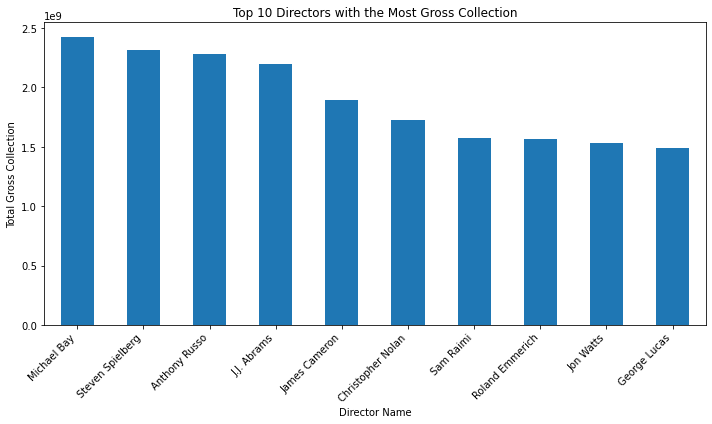

In [19]:
# Group by 'Director Name' and sum the 'Gross Collection' for each director
director_gross_collection = merged_df.groupby('Director Name')['Gross Collection'].sum()

# Sort the directors based on their total gross collection in descending order
director_gross_collection_sorted = director_gross_collection.sort_values(ascending=False)

# Display the director with the most gross collection and their total amount
director_with_most_gross = director_gross_collection_sorted.index[0]
most_gross_collection = director_gross_collection_sorted.iloc[0]
print(f"The director with the most gross collection is {director_with_most_gross} with ${most_gross_collection:.2f}.")

# Plotting the top 10 directors with the most gross collection
top_10_directors_gross = director_gross_collection_sorted.head(10)
plt.figure(figsize=(10, 6))
top_10_directors_gross.plot(kind='bar')
plt.xlabel('Director Name')
plt.ylabel('Total Gross Collection')
plt.title('Top 10 Directors with the Most Gross Collection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Movie duration with most votes**

Group with the most votes: 100-130
Total Votes: 175423480


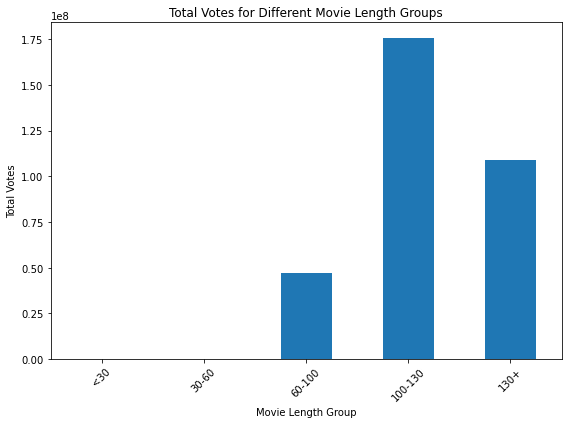

In [20]:
# Categorizing the movie lengths into different groups
bins = [0, 30, 60, 100, 130, float('inf')]
labels = ['<30', '30-60', '60-100', '100-130', '130+']
merged_df['Length Group'] = pd.cut(merged_df['Duration'], bins=bins, labels=labels)

# Calculating the total votes for each group
group_votes = merged_df.groupby('Length Group')['Votes'].sum()

# Find the group with the highest total votes
most_votes_group = group_votes.idxmax()
most_votes_amount = group_votes.max()

# Display the group with the highest total votes
print("Group with the most votes:", most_votes_group)
print("Total Votes:", most_votes_amount)

# Plotting the total votes for each group
plt.figure(figsize=(8, 6))
group_votes.plot(kind='bar')
plt.xlabel('Movie Length Group')
plt.ylabel('Total Votes')
plt.title('Total Votes for Different Movie Length Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Movie duration with most gross collection**

Group with the most Gross_Collection: 100-130
Total Gross_Collection: 71662782183.23587


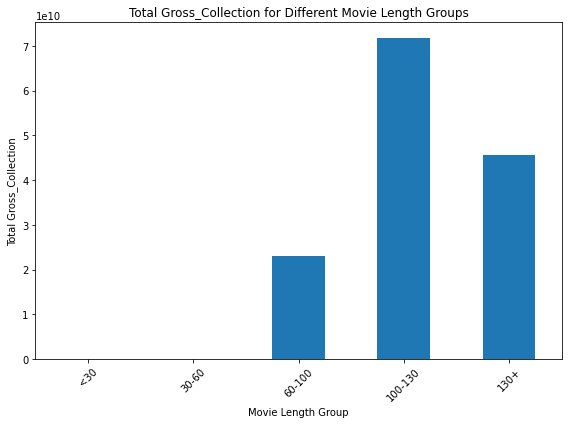

In [21]:
# Categorizing the movie lengths into different groups
bins = [0, 30, 60, 100, 130, float('inf')]
labels = ['<30', '30-60', '60-100', '100-130', '130+']
merged_df['Length Group'] = pd.cut(merged_df['Duration'], bins=bins, labels=labels)

# Calculating the total Gross Collection for each group
group_Gross_Collection = merged_df.groupby('Length Group')['Gross Collection'].sum()

# Find the group with the highest total votes
most_Gross_Collection_group = group_Gross_Collection.idxmax()
most_Gross_Collection_amount = group_Gross_Collection.max()

# Display the group with the highest total Gross_Collection
print("Group with the most Gross_Collection:", most_Gross_Collection_group)
print("Total Gross_Collection:", most_Gross_Collection_amount)

# Plotting the total Gross_Collection for each group
plt.figure(figsize=(8, 6))
group_Gross_Collection.plot(kind='bar')
plt.xlabel('Movie Length Group')
plt.ylabel('Total Gross_Collection')
plt.title('Total Gross_Collection for Different Movie Length Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The year with the most votes **

The year with the most votes is 2014 with 16198588.00 votes.


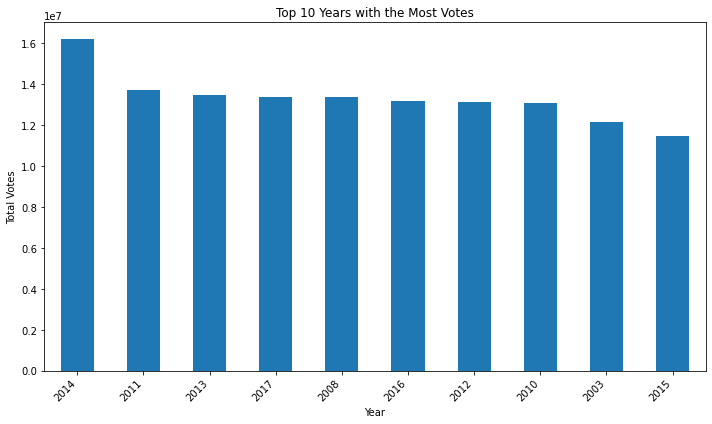

In [22]:
# Group by 'Year' and sum the 'Votes' for each year
year_votes = merged_df.groupby('Year')['Votes'].sum()

# Sort the years based on their total votes in descending order
year_votes_sorted = year_votes.sort_values(ascending=False)

# Display the year with the most votes and the total votes for that year
year_with_most_votes = year_votes_sorted.index[0]
most_votes = year_votes_sorted.iloc[0]
print(f"The year with the most votes is {year_with_most_votes} with {most_votes:.2f} votes.")

# Plotting the top 10 years with the most votes
top_10_years = year_votes_sorted.head(10)
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Top 10 Years with the Most Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The year with the most gross collection**

The year with the most gross collection is 2022 with $7396804483.43 gross collection.


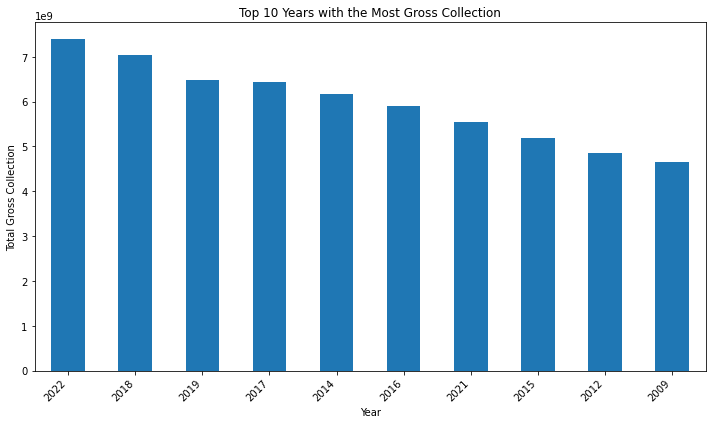

In [23]:
# Group by 'Year' and sum the 'Gross Collection' for each year
year_gross_collection = merged_df.groupby('Year')['Gross Collection'].sum()

# Sort the years based on their total gross collection in descending order
year_gross_collection_sorted = year_gross_collection.sort_values(ascending=False)

# Display the year with the most gross collection and the total gross collection for that year
year_with_most_gross_collection = year_gross_collection_sorted.index[0]
most_gross_collection = year_gross_collection_sorted.iloc[0]
print(f"The year with the most gross collection is {year_with_most_gross_collection} with ${most_gross_collection:.2f} gross collection.")

# Plotting the top 10 years with the most gross collection
top_10_years_gross = year_gross_collection_sorted.head(10)
plt.figure(figsize=(10, 6))
top_10_years_gross.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Gross Collection')
plt.title('Top 10 Years with the Most Gross Collection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The rating category with the most votes**

The rating category with the most votes is 6.6 with 15621476 votes.


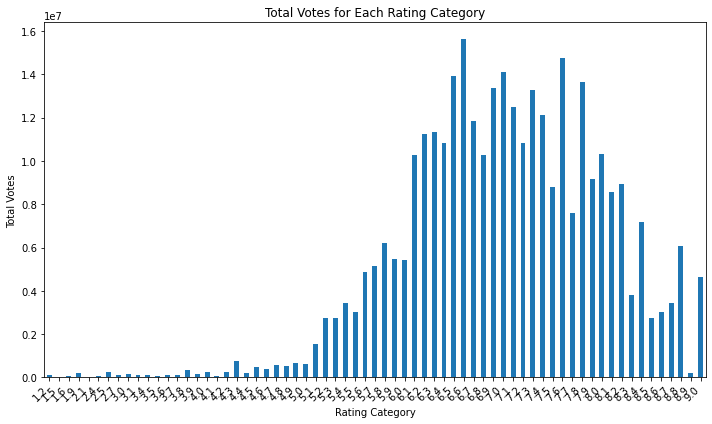

In [24]:
# Group by 'Rating' and sum the 'Votes' for each rating category
rating_votes = merged_df.groupby('Rating')['Votes'].sum()

# Find the rating category with the highest total votes
most_voted_rating = rating_votes.idxmax()
most_votes = rating_votes.max()

# Display the rating category with the most votes and its total votes
print(f"The rating category with the most votes is {most_voted_rating} with {most_votes} votes.")

# Plotting the total votes for each rating category
plt.figure(figsize=(10, 6))
rating_votes.plot(kind='bar')
plt.xlabel('Rating Category')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Rating Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The rating category with the highest gross collection**

The rating category with the highest gross collection is 6.5 with $7565052982.46 gross collection.


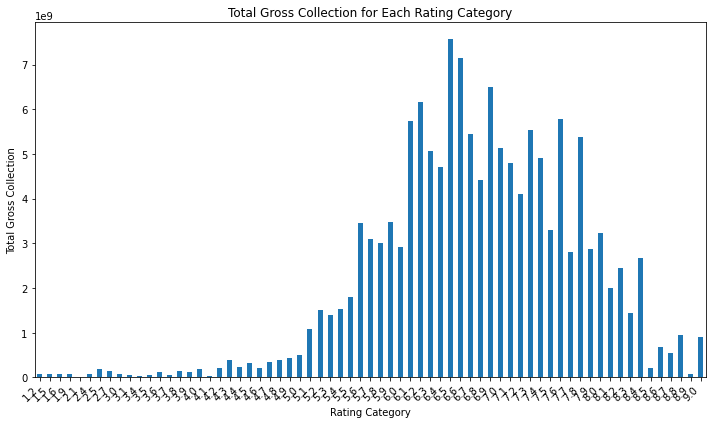

In [25]:
# Group by 'Rating' and sum the 'Gross Collection' for each rating category
rating_gross_collection = merged_df.groupby('Rating')['Gross Collection'].sum()

# Find the rating category with the highest total gross collection
highest_gross_rating = rating_gross_collection.idxmax()
highest_gross_amount = rating_gross_collection.max()

# Display the rating category with the highest gross collection and its total gross collection
print(f"The rating category with the highest gross collection is {highest_gross_rating} with ${highest_gross_amount:.2f} gross collection.")

# Plotting the total gross collection for each rating category
plt.figure(figsize=(10, 6))
rating_gross_collection.plot(kind='bar')
plt.xlabel('Rating Category')
plt.ylabel('Total Gross Collection')
plt.title('Total Gross Collection for Each Rating Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The Metascore category with the highest votes**

The Metascore category with the highest votes is 68.0 with 10757170.00 votes.


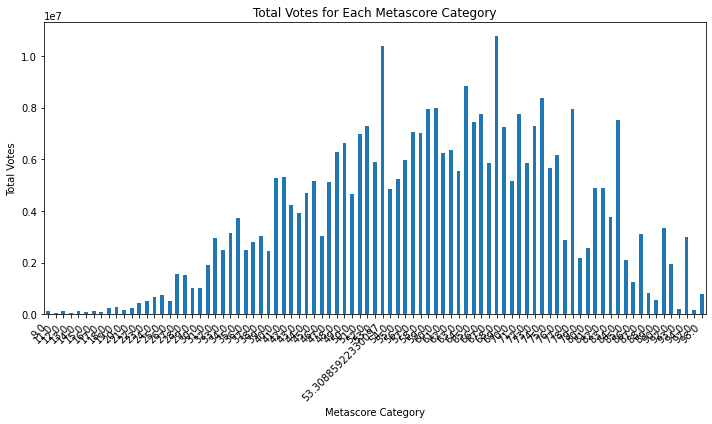

In [26]:
# Group by 'Metascore' and sum the 'Votes' for each Metascore category
metascore_votes = merged_df.groupby('Metascore')['Votes'].sum()

# Find the Metascore category with the highest total votes
highest_votes_metascore = metascore_votes.idxmax()
highest_votes_amount = metascore_votes.max()

# Display the Metascore category with the highest votes and its total votes
print(f"The Metascore category with the highest votes is {highest_votes_metascore} with {highest_votes_amount:.2f} votes.")

# Plotting the total votes for each Metascore category
plt.figure(figsize=(10, 6))
metascore_votes.plot(kind='bar')
plt.xlabel('Metascore Category')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Metascore Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The Metascore category with the highest gross collection**

The Metascore category with the highest gross collection is 53.30885922330097 with 10163438986.35 gross collection.


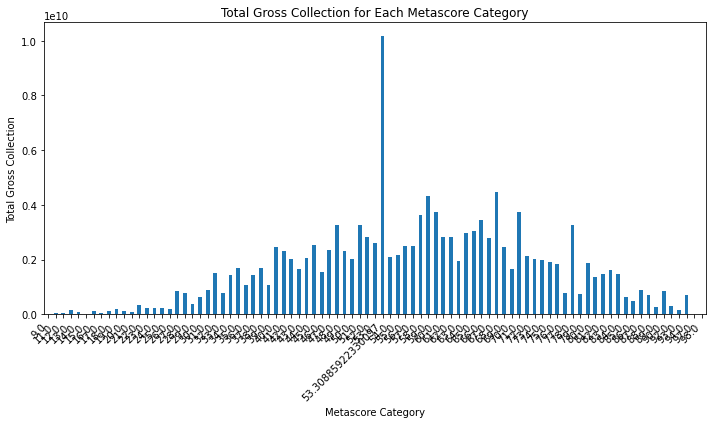

In [27]:
# Group by 'Metascore' and sum the 'Gross Collection' for each Metascore category
metascore_gross_collection = merged_df.groupby('Metascore')['Gross Collection'].sum()

# Find the Metascore category with the highest total gross collection
highest_gross_metascore = metascore_gross_collection.idxmax()
highest_gross_amount = metascore_gross_collection.max()

# Display the Metascore category with the highest gross collection and its total gross collection
print(f"The Metascore category with the highest gross collection is {highest_gross_metascore} with {highest_gross_amount:.2f} gross collection.")

# Plotting the total gross collection for each Metascore category
plt.figure(figsize=(10, 6))
metascore_gross_collection.plot(kind='bar')
plt.xlabel('Metascore Category')
plt.ylabel('Total Gross Collection')
plt.title('Total Gross Collection for Each Metascore Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The certificate with the highest votes**

The certificate with the highest votes is '12A' with 129485557.00 votes.


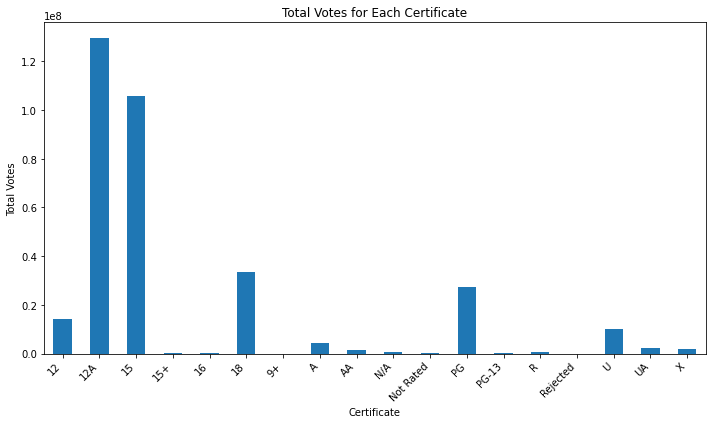

In [28]:
# Group by 'Certification' and sum the 'Votes' for each certificate
certificate_votes = merged_df.groupby('Certification')['Votes'].sum()

# Find the certificate with the highest total votes
highest_votes_certificate = certificate_votes.idxmax()
highest_votes_count = certificate_votes.max()

# Display the certificate with the highest votes and its total votes
print(f"The certificate with the highest votes is '{highest_votes_certificate}' with {highest_votes_count:.2f} votes.")

# Plotting the total votes for each certificate
plt.figure(figsize=(10, 6))
certificate_votes.plot(kind='bar')
plt.xlabel('Certificate')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Certificate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The certificate with the highest gross collection**

The certificate with the highest gross collection is '12A' with 57701334912.28 gross collection.


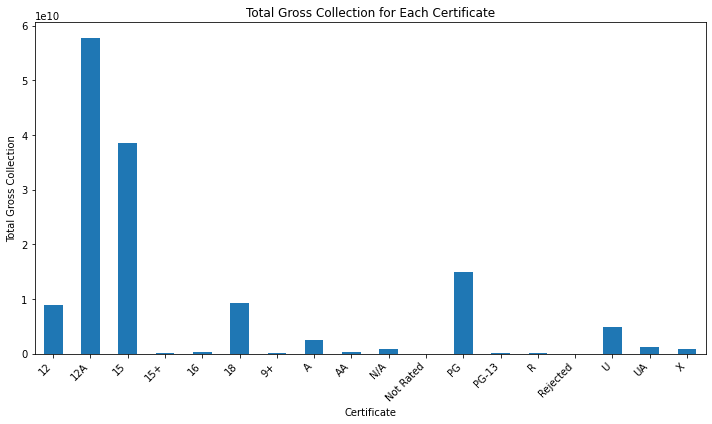

In [29]:
# Group by 'Certification' and sum the 'Gross Collection' for each certificate
certificate_gross_collection = merged_df.groupby('Certification')['Gross Collection'].sum()

# Find the certificate with the highest total gross collection
highest_gross_certificate = certificate_gross_collection.idxmax()
highest_gross_amount = certificate_gross_collection.max()

# Display the certificate with the highest gross collection and its total gross collection
print(f"The certificate with the highest gross collection is '{highest_gross_certificate}' with {highest_gross_amount:.2f} gross collection.")

# Plotting the total gross collection for each certificate
plt.figure(figsize=(10, 6))
certificate_gross_collection.plot(kind='bar')
plt.xlabel('Certificate')
plt.ylabel('Total Gross Collection')
plt.title('Total Gross Collection for Each Certificate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The star with the most votes**

In [30]:
# Create a new DataFrame to store star votes
star_votes = pd.DataFrame()

# Concatenate votes for each star (Star1, Star2, Star3, Star4)
star_votes['Star'] = pd.concat([merged_df['Star1'], merged_df['Star2'], merged_df['Star3'], merged_df['Star4']], ignore_index=True)
star_votes['Votes'] = pd.concat([merged_df['Votes'], merged_df['Votes'], merged_df['Votes'], merged_df['Votes']], ignore_index=True)

# Group by 'Star' and sum the 'Votes' for each star
star_votes_sum = star_votes.groupby('Star')['Votes'].sum()

# Find the star with the highest total votes
star_with_most_votes = star_votes_sum.idxmax()
most_votes = star_votes_sum.max()

# Display the star with the most votes and their total votes
print(f"The star with the most votes is '{star_with_most_votes}' with {most_votes:.2f} votes.")


The star with the most votes is 'Robert Downey Jr.' with 10656387.00 votes.


**The star with the most gross collection**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame with the movie data

# Create a new DataFrame to store star gross collection
star_gross_collection = pd.DataFrame()

# Concatenate gross collection for each star (Star1, Star2, Star3, Star4)
star_gross_collection['Star'] = pd.concat([merged_df['Star1'], merged_df['Star2'], merged_df['Star3'], merged_df['Star4']], ignore_index=True)
star_gross_collection['Gross Collection'] = pd.concat([merged_df['Gross Collection'], merged_df['Gross Collection'], merged_df['Gross Collection'], merged_df['Gross Collection']], ignore_index=True)

# Group by 'Star' and sum the 'Gross Collection' for each star
star_gross_collection_sum = star_gross_collection.groupby('Star')['Gross Collection'].sum()

# Find the star with the highest total gross collection
star_with_most_gross_collection = star_gross_collection_sum.idxmax()
most_gross_collection = star_gross_collection_sum.max()

# Display the star with the most gross collection and their total gross collection
print(f"The star with the most gross collection is '{star_with_most_gross_collection}' with {most_gross_collection:.2f} gross collection.")



The star with the most gross collection is 'Robert Downey Jr.' with 4996230000.00 gross collection.


**The genre with the most Votes and Gross Collection**

The genre with the most Votes is ('Action', 'Adventure', 'Sci-Fi') with $50852832.00.


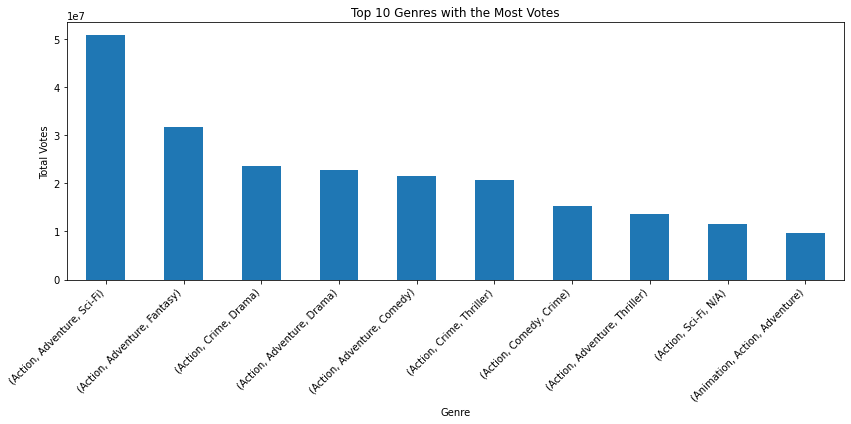

In [32]:
# Group by 'Genre1', 'Genre2', and 'Genre3', and sum the 'Votes' for each genre
genre_Votes = merged_df.groupby(['Genre1', 'Genre2', 'Genre3'])['Votes'].sum()

# Sort the genres based on their total Votes in descending order
genre_Votes_sorted = genre_Votes.sort_values(ascending=False)

# Display the genre with the most Votes and its total amount
genre_with_most_Votes = genre_Votes_sorted.index[0]
most_Votes = genre_Votes_sorted.iloc[0]
print(f"The genre with the most Votes is {genre_with_most_Votes} with ${most_Votes:.2f}.")

# Plotting the top 10 genres with the most Votes
top_10_genres_Votes = genre_Votes_sorted.head(10)
plt.figure(figsize=(12, 6))
top_10_genres_Votes.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.title('Top 10 Genres with the Most Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Genres most related to directors**

Genres most related to directors:
Action       891
Animation     49
N/A            1
dtype: int64


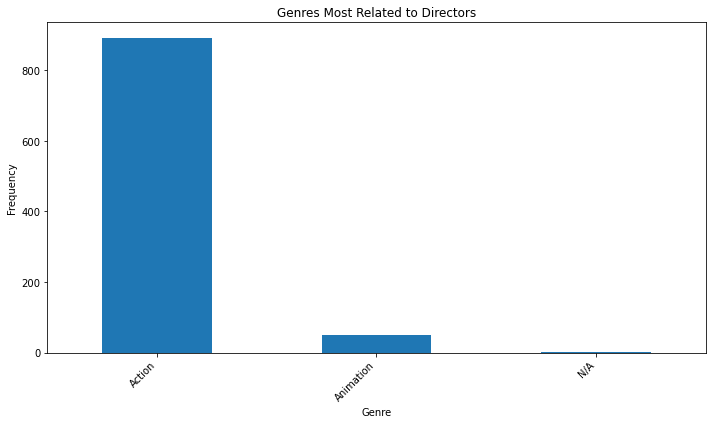

In [33]:
# Count the occurrences of genres for each director
director_genres_counts = merged_df.groupby('Director Name')[['Genre1', 'Genre2', 'Genre3']].apply(lambda x: x.stack().value_counts().idxmax())

# Get the count of the most frequent genres for each director
director_genres_counts = director_genres_counts.value_counts()

# Display the genres that are most related to directors
print("Genres most related to directors:")
print(director_genres_counts)

# Plotting the most frequent genres related to directors
plt.figure(figsize=(10, 6))
director_genres_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genres Most Related to Directors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Star with the most movie appearances**

Star with the most movie appearances: Jason Statham
Total Movie Appearances: 34


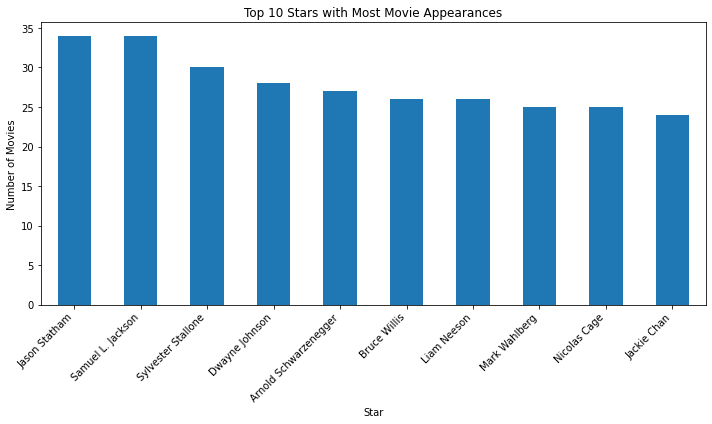

In [34]:
# Creating a new DataFrame to store the count of movies for each star
star_movie_count = pd.DataFrame()

# Getting the counts for each star in 'Star1' column
star1_counts = merged_df['Star1'].value_counts().reset_index()
star1_counts.columns = ['Star', 'Movie Count']

# Getting the counts for each star in 'Star2' column
star2_counts = merged_df['Star2'].value_counts().reset_index()
star2_counts.columns = ['Star', 'Movie Count']

# Getting the counts for each star in 'Star3' column
star3_counts = merged_df['Star3'].value_counts().reset_index()
star3_counts.columns = ['Star', 'Movie Count']

# Getting the counts for each star in 'Star4' column
star4_counts = merged_df['Star4'].value_counts().reset_index()
star4_counts.columns = ['Star', 'Movie Count']

# Concatenating the counts from all columns into one DataFrame
star_movie_count = pd.concat([star1_counts, star2_counts, star3_counts, star4_counts], axis=0, ignore_index=True)

# Grouping by star and summing the counts to get the total movie count for each star
star_movie_count = star_movie_count.groupby('Star')['Movie Count'].sum()

# Get the star with the most movie appearances
most_movies_star = star_movie_count.idxmax()
most_movie_appearances = star_movie_count.max()

# Display the star with the most movie appearances
print("Star with the most movie appearances:", most_movies_star)
print("Total Movie Appearances:", most_movie_appearances)

# Plotting the stars with the most movie appearances
plt.figure(figsize=(10, 6))
star_movie_count.nlargest(10).plot(kind='bar')
plt.xlabel('Star')
plt.ylabel('Number of Movies')
plt.title('Top 10 Stars with Most Movie Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Pairplot**

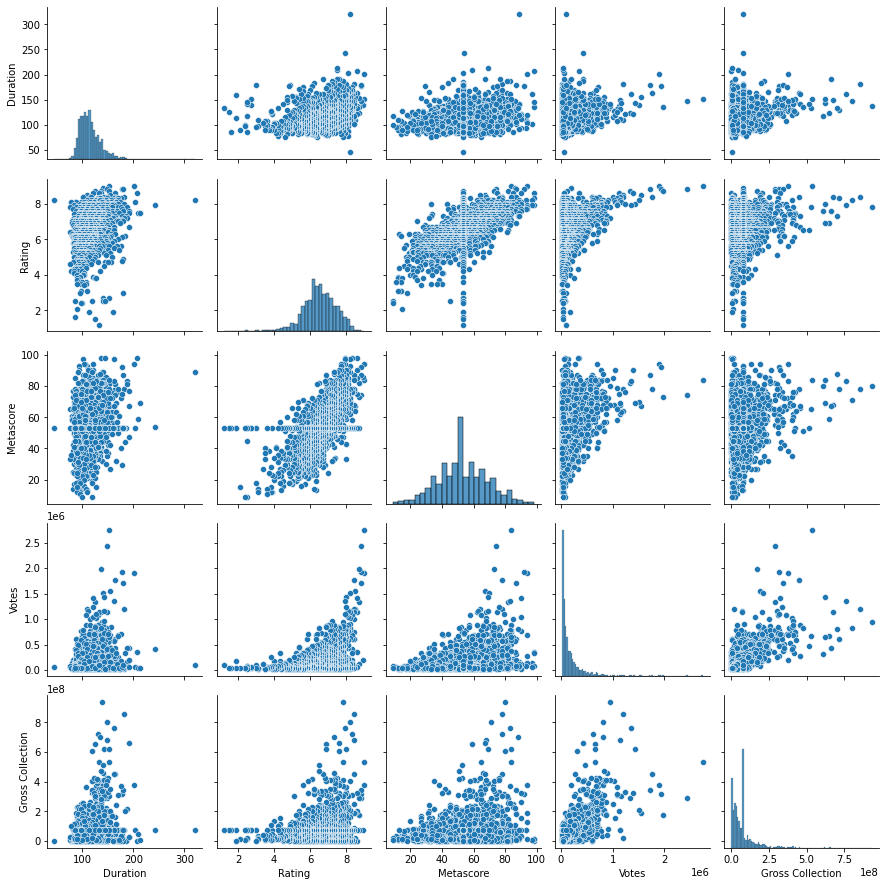

In [35]:
# Select only the numerical columns for the pair plot
numerical_columns = ['Duration', 'Year', 'Rating', 'Metascore', 'Votes', 'Gross Collection']

# Create the pair plot
sns.pairplot(merged_df[numerical_columns])

# Show the plot
plt.show()

**Correlation matrix**

In [36]:
correlation_matrix = merged_df.corr()
print(correlation_matrix)

                  Duration    Rating  Metascore     Votes  Gross Collection
Duration          1.000000  0.333259   0.261931  0.276308          0.287022
Rating            0.333259  1.000000   0.659325  0.412056          0.241871
Metascore         0.261931  0.659325   1.000000  0.349421          0.252626
Votes             0.276308  0.412056   0.349421  1.000000          0.671938
Gross Collection  0.287022  0.241871   0.252626  0.671938          1.000000


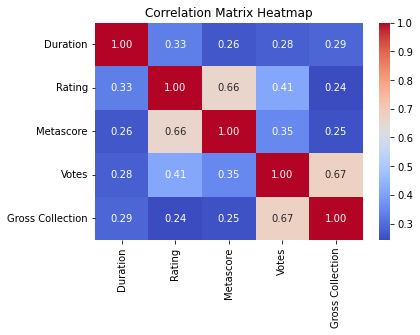

In [37]:
# Heatmap to visualize the correlation
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Top 10 directors based on the number of movies**

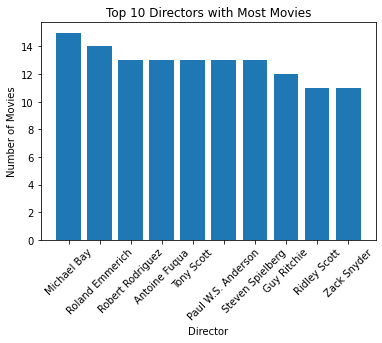

In [38]:
# Bar plot of top 10 directors based on the number of movies
top_directors = merged_df['Director Name'].value_counts().nlargest(10)
plt.bar(top_directors.index, top_directors.values)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors with Most Movies')
plt.xticks(rotation=45)
plt.show()

**average ratings for each certification**

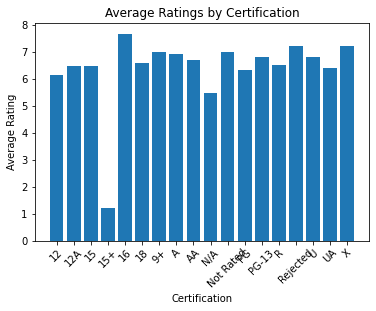

In [39]:
# Bar plot of average ratings for each certification
avg_ratings_by_certification = merged_df.groupby('Certification')['Rating'].mean()
plt.bar(avg_ratings_by_certification.index, avg_ratings_by_certification.values)
plt.xlabel('Certification')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Certification')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Movies with the highest gross collection
highest_gross_movies = merged_df.nlargest(10, 'Gross Collection')
print(highest_gross_movies[['Movie Name', 'Director Name', 'Gross Collection']])

                                     Movie Name    Director Name  \
155  Star Wars: Episode VII - The Force Awakens      J.J. Abrams   
18                            Avengers: Endgame    Anthony Russo   
40                      Spider-Man: No Way Home        Jon Watts   
113                                      Avatar    James Cameron   
28                            Top Gun: Maverick  Joseph Kosinski   
369                               Black Panther     Ryan Coogler   
25                       Avengers: Infinity War    Anthony Russo   
216                    Avatar: The Way of Water    James Cameron   
623                              Jurassic World  Colin Trevorrow   
93                            Avengers Assemble      Joss Whedon   

     Gross Collection  
155       936660000.0  
18        858370000.0  
40        804750000.0  
113       760510000.0  
28        718730000.0  
369       700060000.0  
25        678820000.0  
216       659680000.0  
623       652270000.0  
93        6

In [41]:
# Movies with the highest ratings
highest_rated_movies = merged_df.nlargest(10, 'Rating')
print(highest_rated_movies[['Movie Name', 'Director Name', 'Rating']])

                                          Movie Name       Director Name  \
0                                    The Dark Knight   Christopher Nolan   
1      The Lord of the Rings: The Return of the King       Peter Jackson   
2                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
3                                          Inception   Christopher Nolan   
4  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   
5              The Lord of the Rings: The Two Towers       Peter Jackson   
6                                         The Matrix      Lana Wachowski   
7     Star Wars: Episode V - The Empire Strikes Back      Irvin Kershner   
8                                    Soorarai Pottru       Sudha Kongara   
9                         Terminator 2: Judgment Day       James Cameron   

   Rating  
0     9.0  
1     9.0  
2     8.9  
3     8.8  
4     8.8  
5     8.8  
6     8.7  
7     8.7  
8     8.7  
9     8.6  


In [42]:
# Director Analysis
director_stats = merged_df.groupby('Director Name').agg({'Rating': 'mean', 'Gross Collection': 'sum'})
print(director_stats)

                   Rating  Gross Collection
Director Name                              
A.R. Murugadoss     7.675      1.558051e+08
ALi Khan AK         5.500      7.633255e+07
Aaron Nee           6.100      1.053400e+08
Aaron Schneider     7.000      7.633255e+07
Abhinav Kashyap     6.200      4.630000e+06
...                   ...               ...
Xavier Gens         6.200      3.969000e+07
Yann Demange        7.200      1.270000e+06
Yimou Zhang         7.075      1.168700e+08
Yoshiaki Kawajiri   7.800      7.633255e+07
Zack Snyder         6.900      1.473305e+09

[941 rows x 2 columns]


In [43]:
# Certification Analysis
certification_stats = merged_df.groupby('Certification').agg({'Rating': 'mean', 'Gross Collection': 'sum'})
print(certification_stats)


                 Rating  Gross Collection
Certification                            
12             6.141284      8.950746e+09
12A            6.480728      5.770133e+10
15             6.467376      3.860744e+10
15+            1.200000      7.633255e+07
16             7.666667      2.289977e+08
18             6.585776      9.224757e+09
9+             7.000000      7.633255e+07
A              6.908108      2.435383e+09
AA             6.677778      3.182426e+08
N/A            5.471429      8.154155e+08
Not Rated      7.000000      2.000000e+04
PG             6.314634      1.487124e+10
PG-13          6.800000      1.309826e+08
R              6.520000      7.884000e+07
Rejected       7.200000      3.000000e+04
U              6.813725      4.955050e+09
UA             6.406667      1.192678e+09
X              7.208696      7.880753e+08


In [44]:
# Correlation Analysis
correlation_matrix = merged_df.corr()
print(correlation_matrix)

                  Duration    Rating  Metascore     Votes  Gross Collection
Duration          1.000000  0.333259   0.261931  0.276308          0.287022
Rating            0.333259  1.000000   0.659325  0.412056          0.241871
Metascore         0.261931  0.659325   1.000000  0.349421          0.252626
Votes             0.276308  0.412056   0.349421  1.000000          0.671938
Gross Collection  0.287022  0.241871   0.252626  0.671938          1.000000


In [45]:
merged_df = merged_df.drop('Length Group', axis=1)

In [46]:
merged_df

,Movie Name,Director Name,Duration,Year,Rating,Metascore,Votes,Gross Collection,Certification,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3
0,The Dark Knight,Christopher Nolan,152,2008,9.0,84.000000,2744939,5.348600e+08,12A,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,94.000000,1900488,3.778500e+08,12A,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140,2023,8.9,86.000000,189649,7.633255e+07,PG,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Animation,Action,Adventure
3,Inception,Christopher Nolan,148,2010,8.8,74.000000,2435954,2.925800e+08,12A,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,92.000000,1928870,3.155400e+08,PG,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,Radhe,Prabhu Deva,113,2021,1.9,53.308859,179070,7.633255e+07,15,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller
1836,Race 3,Remo D'Souza,160,2018,1.9,53.308859,47824,1.690000e+06,12A,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller
1837,Angels Apocalypse,Sean Cain,85,2015,1.6,53.308859,42919,7.633255e+07,N/A,Enzo Zelocchi,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,Action,Fantasy,Sci-Fi
1838,The Cost of Deception,Keith English,125,2021,1.5,53.308859,39602,7.633255e+07,N/A,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama


# Checking Skewness

In [47]:
merged_df.skew()

Duration            1.478217
Rating             -0.789180
Metascore           0.049144
Votes               3.832158
Gross Collection    3.570888
dtype: float64

It indicate the degree of skewness in each numeric column of the merged_df DataFrame. Here's how to interpret these values:

**Duration**: Skewness of approximately 1.48 indicates that the distribution of movie durations is right-skewed. This means that there might be a few movies with longer durations that are causing the distribution to have a tail on the right side.

**Rating**: A skewness of approximately -0.79 suggests a slight left-skewness in the distribution of movie ratings. This indicates that there might be a concentration of movies with higher ratings.

**Metascore**: With a skewness value of around 0.05, the distribution of Metascores seems to be relatively close to symmetric. There is only a minor deviation from a perfectly symmetric distribution.

**Votes**: A skewness of approximately 3.83 indicates a significant right-skewness in the distribution of votes. This suggests that there might be a few movies with a high number of votes, causing a tail on the right side.

**Gross Collection**: A skewness of approximately 3.57 suggests that the distribution of gross collection values is heavily right-skewed. This indicates that there might be a few movies with exceptionally high gross collections, causing a long tail on the right side.

# Removing Skewness

In [48]:
import pandas as pd
from scipy.stats import boxcox

# Columns to apply Box-Cox transformation to
columns_to_transform = ['Votes', 'Gross Collection']

# Apply Box-Cox transformation to specified columns
for column in columns_to_transform:
    merged_df[column], _ = boxcox(merged_df[column] + 1)  # Adding 1 to handle zero values

# Check the skewness after transformation
skewness_after_transform = merged_df[columns_to_transform].skew()

# Display skewness values after transformation
print("Skewness after Box-Cox Transformation:")
print(skewness_after_transform)


Skewness after Box-Cox Transformation:
Votes               0.081285
Gross Collection   -0.013592
dtype: float64


The Box-Cox transformation seems to have effectively reduced the skewness in both the 'Votes' and 'Gross Collection' columns. Here's how to interpret the new skewness values:

**Votes**: After the transformation, the skewness of approximately 0.081 suggests that the distribution of votes is now nearly symmetric. This indicates that the Box-Cox transformation has successfully reduced the skewness in the 'Votes' column.

**Gross Collection**: The skewness value of approximately -0.0136 suggests that the distribution of gross collection values is also very close to symmetric. The transformation has helped in bringing the distribution closer to normality.

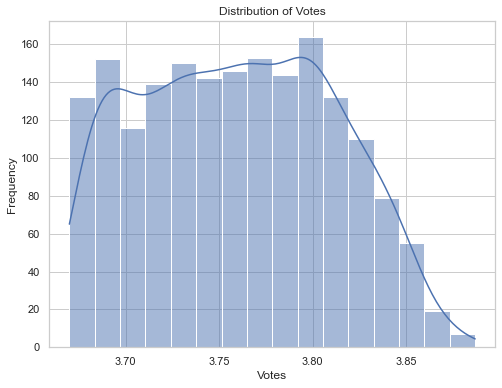

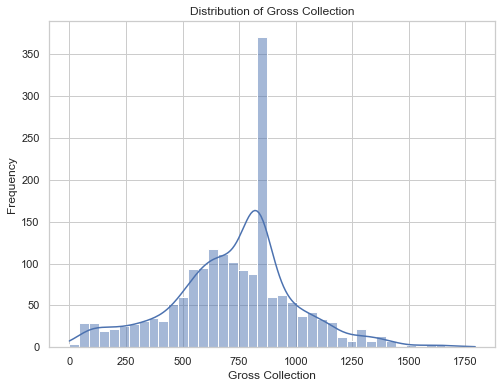

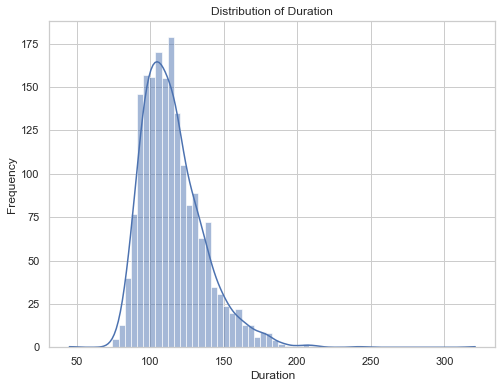

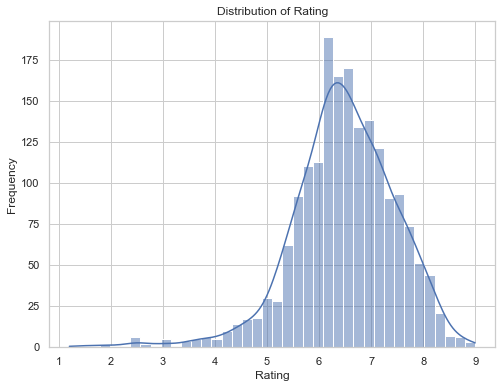

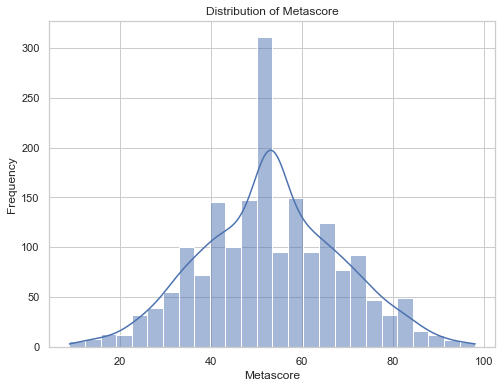

In [49]:
# Columns to visualize
columns_to_visualize = ['Votes', 'Gross Collection','Duration','Rating','Metascore']

# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Create a histogram for each column
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Checking Outliers

In [50]:
# Columns to check for outliers
columns_to_check = ['Votes', 'Gross Collection']

for column in columns_to_check:
    Q1 = merged_df[column].quantile(0.25)
    Q3 = merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = merged_df[(merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)


Outliers in Votes:
Empty DataFrame
Columns: [Movie Name, Director Name, Duration, Year, Rating, Metascore, Votes, Gross Collection, Certification, Star1, Star2, Star3, Star4, Genre1, Genre2, Genre3]
Index: []
Outliers in Gross Collection:
                                             Movie Name        Director Name  \
0                                       The Dark Knight    Christopher Nolan   
1         The Lord of the Rings: The Return of the King        Peter Jackson   
3                                             Inception    Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring        Peter Jackson   
5                 The Lord of the Rings: The Two Towers        Peter Jackson   
...                                                 ...                  ...   
1668                                           Big Game     Jalmari Helander   
1678                                     Killing Season  Mark Steven Johnson   
1711                                     

Outliers in Duration:
                                             Movie Name  \
1         The Lord of the Rings: The Return of the King   
4     The Lord of the Rings: The Fellowship of the Ring   
5                 The Lord of the Rings: The Two Towers   
11                                        Seven Samurai   
18                                    Avengers: Endgame   
29                                                 Heat   
35                                     K.G.F: Chapter 2   
36                                               Vikram   
38                                           Raatchasan   
49                                   Gangs of Wasseypur   
50                          Baahubali 2: The Conclusion   
54                                         Sherlock Jr.   
57                                         Rangasthalam   
77                                               Sholay   
79                                              Kaththi   
80                                

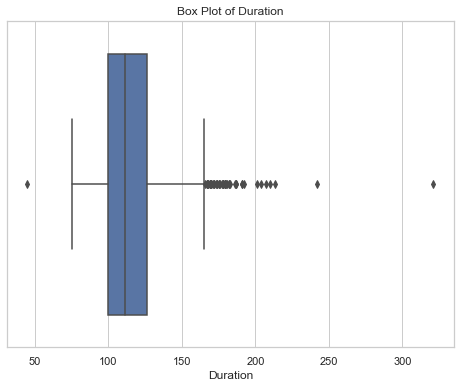

Outliers in Rating:
                                         Movie Name        Director Name  \
0                                   The Dark Knight    Christopher Nolan   
1     The Lord of the Rings: The Return of the King        Peter Jackson   
2               Spider-Man: Across the Spider-Verse   Joaquim Dos Santos   
888                                      Rollerball       John McTiernan   
889                                      Rollerball       John McTiernan   
1803                                         Torque          Joseph Kahn   
1804                                      RoboCop 3          Fred Dekker   
1805                             The Last Airbender   M. Night Shyamalan   
1806                                 Street Fighter   Steven E. de Souza   
1807                                 Shark Night 3D       David R. Ellis   
1808                                 Escape Plan II     Steven C. Miller   
1809                        Speed 2: Cruise Control          Jan de 

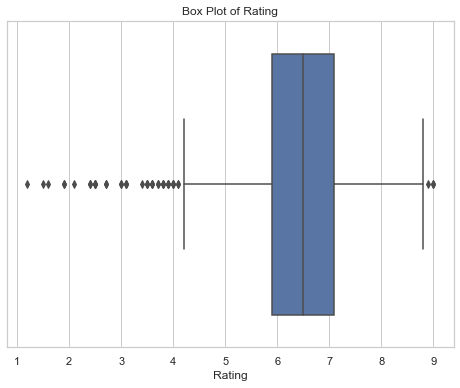

Outliers in Metascore:
                        Movie Name     Director Name  Duration  Year  Rating  \
11                   Seven Samurai    Akira Kurosawa       207  1954     8.6   
32              North by Northwest  Alfred Hitchcock       136  1959     8.3   
47                             Ran    Akira Kurosawa       162  1985     8.2   
130                 The Wild Bunch     Sam Peckinpah       145  1969     7.9   
134   The Adventures of Robin Hood    Michael Curtiz       102  1938     7.9   
1817   Mortal Kombat: Annihilation  John R. Leonetti        95  1997     3.6   
1829             Battlefield Earth   Roger Christian       118  2000     2.5   
1832             Alone in the Dark          Uwe Boll        99  2005     2.4   

      Metascore     Votes  Gross Collection Certification             Star1  \
11         98.0  3.822272        145.853037             A    Toshirô Mifune   
32         98.0  3.820084        486.633137             A        Cary Grant   
47         97.0  3.

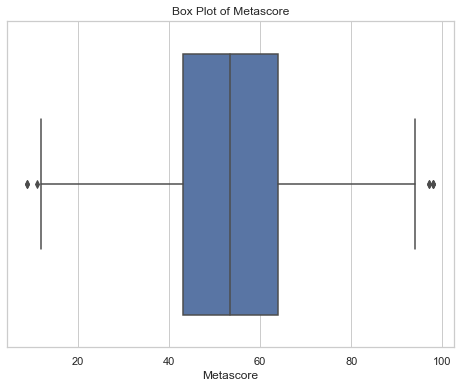

Outliers in Votes:
Empty DataFrame
Columns: [Movie Name, Director Name, Duration, Year, Rating, Metascore, Votes, Gross Collection, Certification, Star1, Star2, Star3, Star4, Genre1, Genre2, Genre3]
Index: []


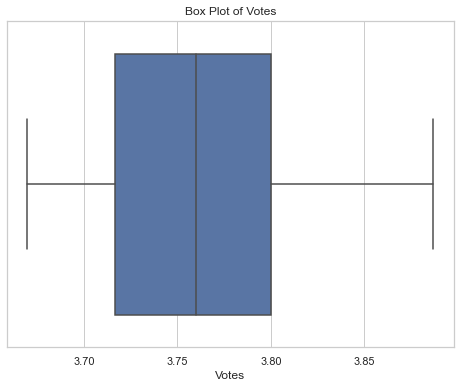

Outliers in Gross Collection:
                                             Movie Name        Director Name  \
0                                       The Dark Knight    Christopher Nolan   
1         The Lord of the Rings: The Return of the King        Peter Jackson   
3                                             Inception    Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring        Peter Jackson   
5                 The Lord of the Rings: The Two Towers        Peter Jackson   
...                                                 ...                  ...   
1668                                           Big Game     Jalmari Helander   
1678                                     Killing Season  Mark Steven Johnson   
1711                                      The Bad Batch    Ana Lily Amirpour   
1723                                  Mutant Chronicles         Simon Hunter   
1725                         The Twilight Saga: Eclipse          David Slade   

      Dur

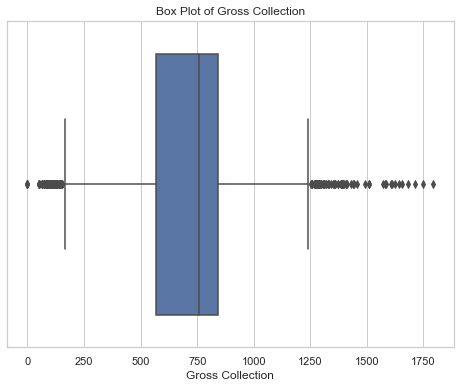

In [51]:
# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Calculate and visualize outliers for all numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = merged_df[column].quantile(0.25)
    Q3 = merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = merged_df[(merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(outliers)
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=merged_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


# Removing Ouliers
 **IQR Method for Outlier Removal**

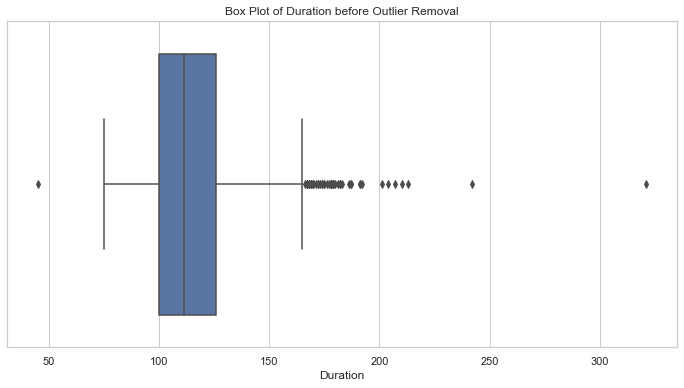

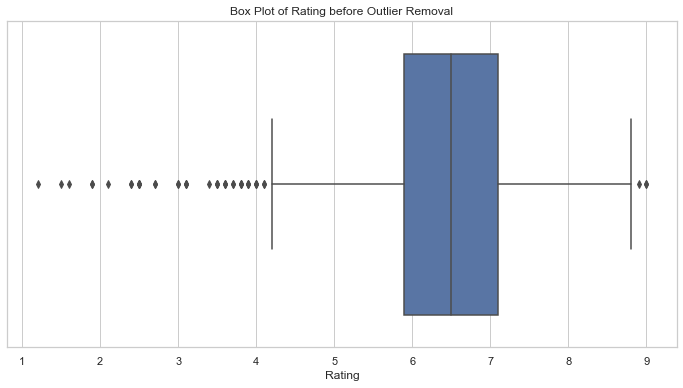

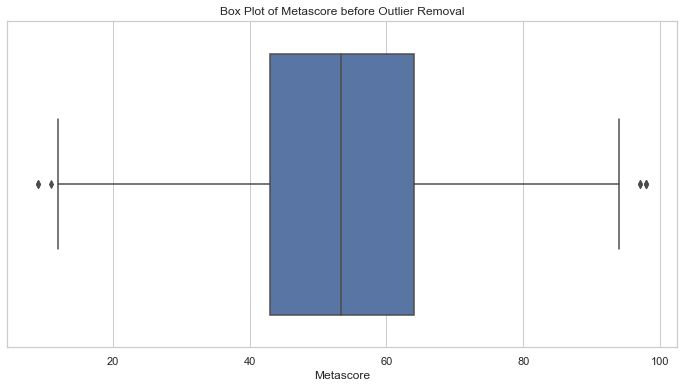

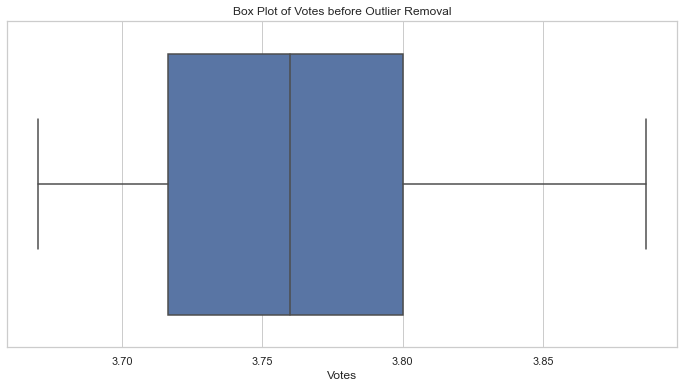

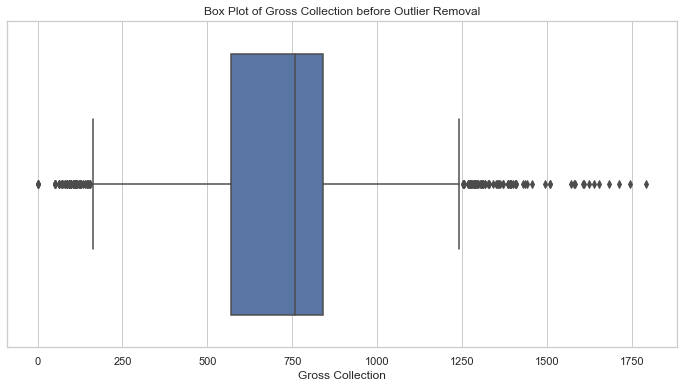

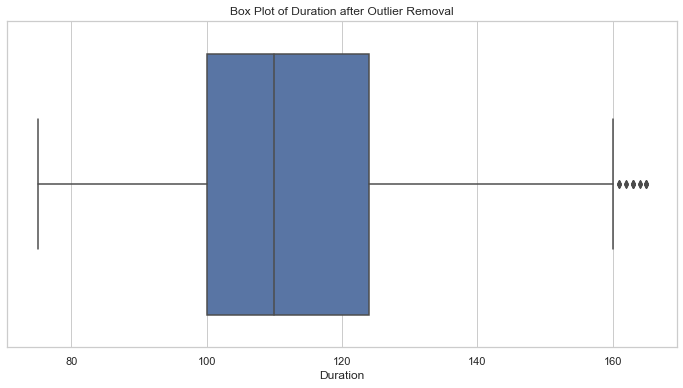

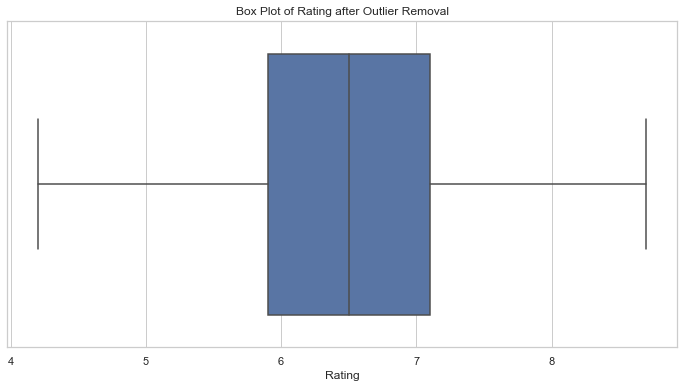

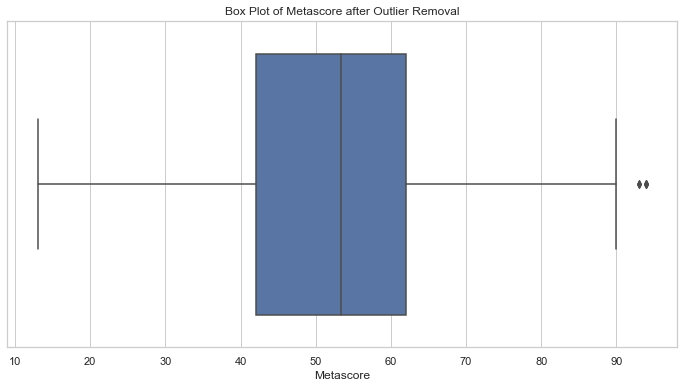

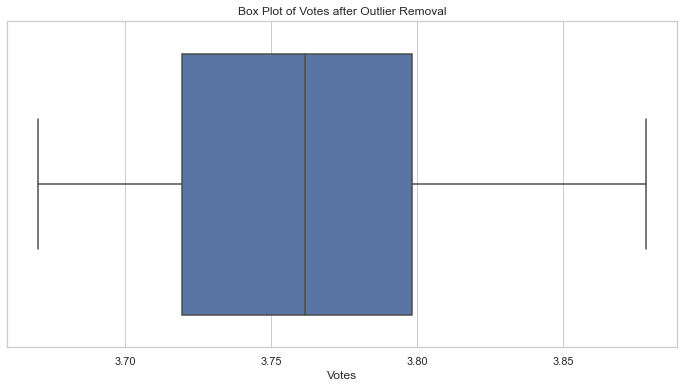

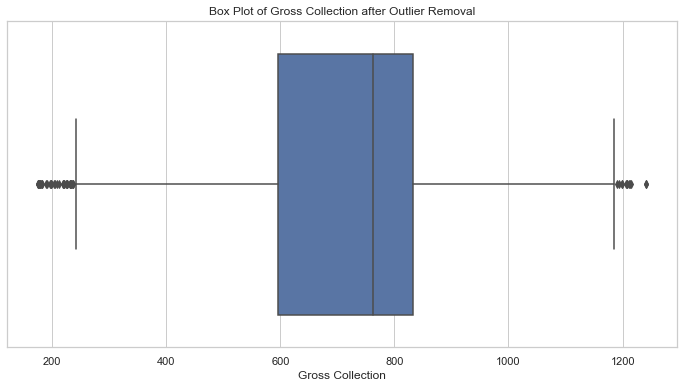

In [52]:
# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Columns to remove outliers from
columns_to_remove_outliers = ['Duration', 'Rating', 'Metascore', 'Votes', 'Gross Collection']

# Create box plots before outlier removal
for column in columns_to_remove_outliers:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=merged_df[column])
    plt.title(f'Box Plot of {column} before Outlier Removal')
    plt.xlabel(column)
    plt.show()

# Apply IQR method to remove outliers from each column
for column in columns_to_remove_outliers:
    Q1 = merged_df[column].quantile(0.25)
    Q3 = merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    merged_df = merged_df[(merged_df[column] >= lower_bound) & (merged_df[column] <= upper_bound)]

# Create box plots after outlier removal
for column in columns_to_remove_outliers:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=merged_df[column])
    plt.title(f'Box Plot of {column} after Outlier Removal')
    plt.xlabel(column)
    plt.show()

IQR method didn't remove all the outliers from certain columns, we can consider applying other methods to those columns. Here's how we can use the **Winsorization method** to further remove outliers from the 'Duration', 'Metascore', and 'Gross Collection' columns:

**Winsorization method**

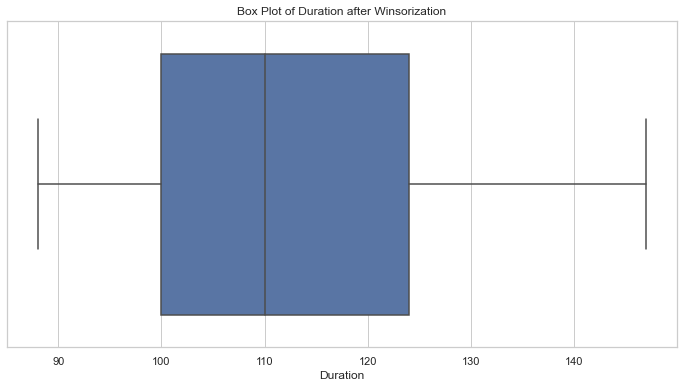

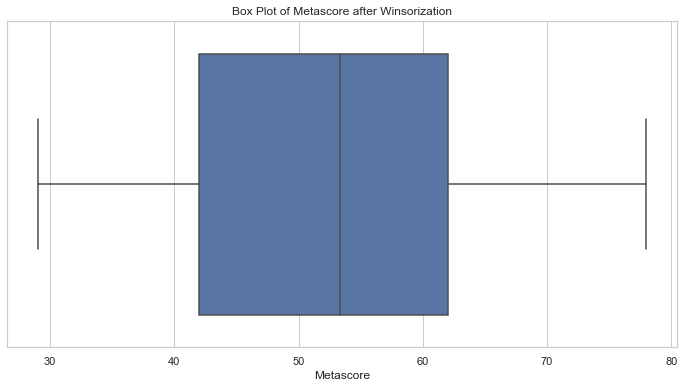

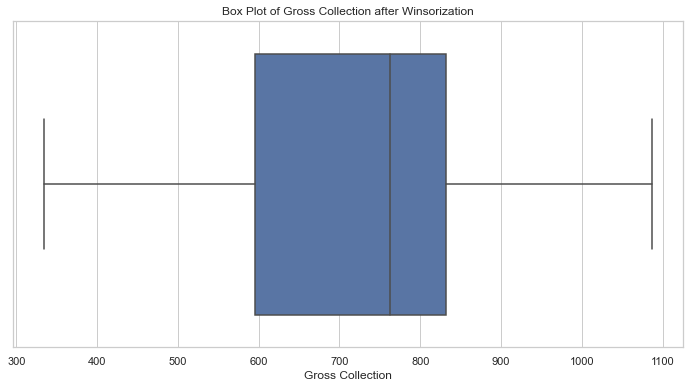

In [53]:
from scipy.stats.mstats import winsorize

# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Columns to perform Winsorization on
columns_to_winsorize = ['Duration', 'Metascore', 'Gross Collection']

# Apply Winsorization to each column
for column in columns_to_winsorize:
    merged_df[column] = winsorize(merged_df[column], limits=[0.05, 0.05])

# Create box plots after Winsorization
for column in columns_to_winsorize:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=merged_df[column])
    plt.title(f'Box Plot of {column} after Winsorization')
    plt.xlabel(column)
    plt.show()

In [54]:
merged_df.head()

,Movie Name,Director Name,Duration,Year,Rating,Metascore,Votes,Gross Collection,Certification,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3
6,The Matrix,Lana Wachowski,136,1999,8.7,73.000000,3.878580,1066.599771,15,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Action,Sci-Fi,N/A
8,Soorarai Pottru,Sudha Kongara,147,2020,8.7,53.308859,3.771901,832.348945,15,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,Action,Drama,N/A
9,Terminator 2: Judgment Day,James Cameron,137,1991,8.6,75.000000,3.862916,1087.358672,15,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,Action,Sci-Fi,N/A
12,Harakiri,Masaki Kobayashi,133,1962,8.6,78.000000,3.734010,832.348945,X,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,Action,Drama,Mystery
13,Sita Ramam,Hanu Raghavapudi,147,2022,8.6,53.308859,3.733249,832.348945,12A,Dulquer Salmaan,Mrunal Thakur,Rashmika Mandanna,Sumanth,Action,Drama,Mystery


# PHASE 4

**Objective 1: Predict Votes and Gross Collection**

To achieve this, we'll follow these steps:

Preprocess the data: Prepare the features and labels for both the 'Votes' and 'Gross Collection' predictions.
Split the data: Divide the dataset into training and testing sets.
Choose appropriate models: Select suitable machine learning models for regression tasks (since both votes and gross collection are continuous values).
Train and evaluate models: Train the models on the training data, tune their hyperparameters, and evaluate their performance on the testing data.
Make predictions: Use the trained models to predict 'Votes' and 'Gross Collection' on new data.
    
**Objective 2: Scaling, Hyperparameter Tuning, and Overfitting**

Scaling: Apply appropriate scaling techniques (such as StandardScaler) to normalize the features before training the models.
Hyperparameter Tuning: Use techniques like GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for the models.
Avoid Overfitting: Regularization techniques (e.g., Ridge, Lasso) and cross-validation can help avoid overfitting.
    
**Objective 3: Save the Best Model**

After tuning and evaluating various models, you can select the best-performing model based on evaluation metrics (e.g., Mean Squared Error, R-squared) on the testing data. Save the chosen model for future predictions.

# Standard Scaling (Votes)

In [60]:
!pip install category_encoders

In [62]:
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_df' is already loaded and Winsorization has been applied

# Features and target variable for votes prediction
X_votes = merged_df.drop(['Votes'], axis=1)  # Drop 'Votes' as it's the target variable
y_votes = merged_df['Votes']

# Define categorical columns for one-hot encoding
categorical_columns = ['Movie Name', 'Director Name', 'Year', 'Certification', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3']

# Apply one-hot encoding to categorical columns
X_votes_encoded = pd.get_dummies(X_votes, columns=categorical_columns)

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to the features for votes prediction
X_votes_scaled = scaler.fit_transform(X_votes_encoded)

# Display the scaled features
print("Scaled Features for Votes Prediction:")
print(X_votes_scaled)


Scaled Features for Votes Prediction:
[[ 1.42530672  2.65520388  1.48297198 ... -0.48118444 -0.1124732
  -0.06626815]
 [ 2.09925158  2.65520388  0.04326214 ... -0.48118444 -0.1124732
  -0.06626815]
 [ 1.48657443  2.5357641   1.62920118 ... -0.48118444 -0.1124732
  -0.06626815]
 ...
 [-0.84159875 -2.71958648 -1.73407033 ... -0.48118444 -0.1124732
  -0.06626815]
 [-1.51554361 -2.71958648 -1.73407033 ... -0.48118444 -0.1124732
  -0.06626815]
 [ 1.30277129 -2.71958648  0.04326214 ... -0.48118444 -0.1124732
  -0.06626815]]


# Machine Learning Model Building

# Predictions of Votes

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso



In [64]:
# Split the data into features (X) and target (y) for votes prediction
X_votes = X_votes_encoded  # Use the encoded and scaled features
y_votes = merged_df['Votes']  # Target variable

# Split the data into training and testing sets
X_votes_train, X_votes_test, y_votes_train, y_votes_test = train_test_split(X_votes, y_votes, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_votes_train shape:", X_votes_train.shape)
print("X_votes_test shape:", X_votes_test.shape)
print("y_votes_train shape:", y_votes_train.shape)
print("y_votes_test shape:", y_votes_test.shape)

X_votes_train shape: (1280, 6752)
X_votes_test shape: (321, 6752)
y_votes_train shape: (1280,)
y_votes_test shape: (321,)


# Best R2 Score on Random_state

In [65]:
# Split the data into training and testing sets
X_votes_train, X_votes_test, y_votes_train, y_votes_test = train_test_split(X_votes_scaled, y_votes, test_size=0.2, random_state=42)

best_r2_score = -1  # Initialize with a value lower than any possible R2 score
best_random_state = None

for random_state in range(1, 101):
    # Create and train the Random Forest Regressor model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_votes_train, y_votes_train)
    
    # Make predictions on the test set
    y_votes_pred = model.predict(X_votes_test)
    
    # Calculate the R2 score
    r2 = r2_score(y_votes_test, y_votes_pred)
    
    # Check if the current model's R2 score is better than the best score so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best R2 Score:", best_r2_score)
print("Best Random State:", best_random_state)


Best R2 Score: 0.6486524917724169
Best Random State: 51


# Linear Regression : Base model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into train and test sets using the best random state
X_votes_train, X_votes_test, y_votes_train, y_votes_test = train_test_split(X_votes_scaled, y_votes, random_state=51, test_size=0.2)

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_votes_train, y_votes_train)

# Make predictions on the test data
y_votes_pred = lin_reg.predict(X_votes_test)

# Calculate R2 score on the test data
r2_score_votes = r2_score(y_votes_test, y_votes_pred)

# Display the R2 score
print("R2 Score for Linear Regression (Votes):", r2_score_votes)


R2 Score for Linear Regression (Votes): 0.22888264570857497


# Linear Regression Evaluation Matrix

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression model
print('\033[1m' + ' Error :' + '\033[0m')
print('Mean absolute error:', mean_absolute_error(y_votes_test, y_votes_pred))
print('Mean squared error:', mean_squared_error(y_votes_test, y_votes_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_votes_test, y_votes_pred)))
print('\n')

print('\033[1m' + ' R2 Score :' + '\033[0m')
r2 = r2_score(y_votes_test, y_votes_pred, multioutput='variance_weighted')
print('R2 Score for Linear Regression (Votes):', r2)


 Error :
Mean absolute error: 0.034801740291475564
Mean squared error: 0.0018710090647707858
Root Mean Squared Error: 0.04325516229042247


 R2 Score :
R2 Score for Linear Regression (Votes): 0.22888264570857497


# Applying other Regression Model, Evaluation & Crossvalidation

In [69]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a list of regression models
models = [
    RandomForestRegressor(n_estimators=70, max_depth=25),
    DecisionTreeRegressor(),
    AdaBoostRegressor(learning_rate=0.1),
    GradientBoostingRegressor(max_depth=25, learning_rate=0.1),
    Ridge(alpha=0.01)
]

# Iterate over each model
for m in models:
    m.fit(X_votes_train, y_votes_train)  
    m.score(X_votes_train, y_votes_train)
    y_pred = m.predict(X_votes_test)     

    print('\033[1m' + ' Error of ' + str(m) + ' :' + '\033[0m')
    print('Mean absolute error:', mean_absolute_error(y_votes_test, y_pred))
    print('Mean squared error:', mean_squared_error(y_votes_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_votes_test, y_pred)))
    print('\n')

    r2 = r2_score(y_votes_test, y_pred)
    print('\033[1m' + ' R2 Score :' + '\033[0m')
    print(r2)
    print('==============================================================================================================')


 Error of RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error: 0.022487846124551795
Mean squared error: 0.0008224074445612944
Root Mean Squared Error: 0.028677647123871483


 R2 Score :
0.6610531371865007
 Error of DecisionTreeRegressor() :
Mean absolute error: 0.03028341936317632
Mean squared error: 0.0016163678137282318
Root Mean Squared Error: 0.04020407707842865


 R2 Score :
0.33383044713542076
 Error of AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error: 0.02765586952433689
Mean squared error: 0.0011611623936891452
Root Mean Squared Error: 0.03407583298599089


 R2 Score :
0.5214387306915775
 Error of GradientBoostingRegressor(max_depth=25) :
Mean absolute error: 0.02871614433204339
Mean squared error: 0.001430752207687226
Root Mean Squared Error: 0.03782528529551662


 R2 Score :
0.41033003109819255
 Error of Ridge(alpha=0.01) :
Mean absolute error: 0.033137886915752424
Mean squared error: 0.00164255775568462
Root Mean Squared Error: 0.040528480796

It looks like the **RandomForestRegressor** is performing quite well with an **R2 score of 0.661**. This indicates that the **model is explaining around 66.1% of the variance in the target variable**.

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

# Define the models
rf = RandomForestRegressor(n_estimators=70, max_depth=25)
rd = Ridge(alpha=0.01)
dtc = DecisionTreeRegressor()
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=25, learning_rate=0.1)

# List of models
models = [rf, rd, dtc, adb, gradb]

for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X_votes_scaled, y_votes, cv=5)

    print('\n')
    print('\033[1m' + 'Cross Validation Score for', model, ':\n' + '\033[0m')
    print("Mean CV Score:", scores.mean())
    print('==============================================================================================================')




Cross Validation Score for RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score: 0.4525371979719853


Cross Validation Score for Ridge(alpha=0.01) :

Mean CV Score: 0.027552177497244545


Cross Validation Score for DecisionTreeRegressor() :

Mean CV Score: 0.052895251148183185


Cross Validation Score for AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score: 0.30329630402864793


Cross Validation Score for GradientBoostingRegressor(max_depth=25) :

Mean CV Score: 0.18678856026467222


# Hyper Parameter Tuning : GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for RandomForestRegressor
parameter_grid = {
    'n_estimators': [30, 60, 80],
    'max_depth': [10, 20, 40],
    'min_samples_leaf': [5, 10],
    'criterion': ['mse', 'mae'],
    'max_features': ["auto", "sqrt", "log2"]
}

# Create a GridSearchCV object for RandomForestRegressor
grid_search = GridSearchCV(RandomForestRegressor(), parameter_grid, cv=5, n_jobs=-1, verbose=3)

# Perform the GridSearchCV
grid_search.fit(X_votes_train, y_votes_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'mse', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 80}
Best R2 Score: 0.5784658652432524


# Final Model

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Create the final model with the best parameters
final_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=40,
                                    max_features='auto', min_samples_leaf=5)

# Fit the final model on the training data
final_model.fit(X_votes_train, y_votes_train)

# Make predictions on the test data
y_pred_final = final_model.predict(X_votes_test)

# Calculate and print the evaluation metrics
print('\033[1m' + ' Error in Final Model :' + '\033[0m')
print('Mean absolute error:', mean_absolute_error(y_votes_test, y_pred_final))
print('Mean squared error:', mean_squared_error(y_votes_test, y_pred_final))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_votes_test, y_pred_final)))
print('\n')
print('\033[1m' + ' R2 Score of Final Model :' + '\033[0m')
print(r2_score(y_votes_test, y_pred_final))


 Error in Final Model :
Mean absolute error: 0.023328747201108016
Mean squared error: 0.0008546733164970764
Root Mean Squared Error: 0.02923479633069258


 R2 Score of Final Model :
0.6477550862740247


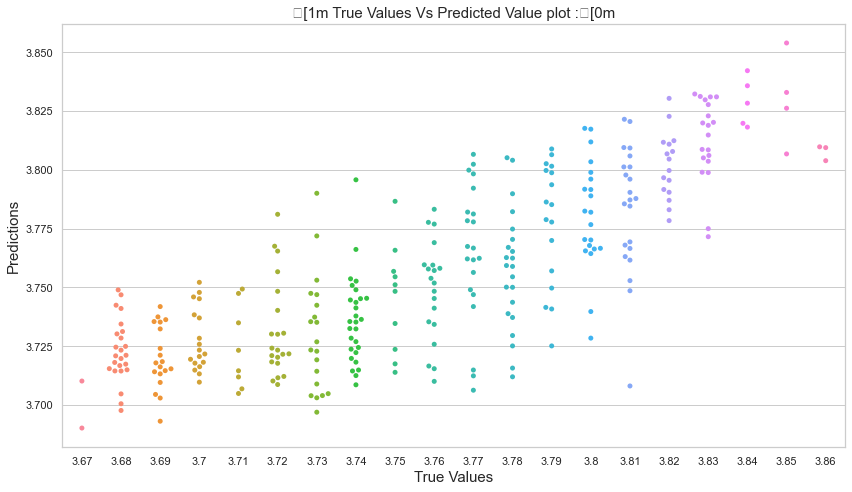

In [74]:
# Make predictions on the test data using the final model
y_pred_final = final_model.predict(X_votes_test)

# Create a scatter plot of True Values vs Predicted Values
plt.figure(figsize=(12, 7))
sns.swarmplot(y_votes_test.round(2), y_pred_final)
plt.title('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()


# Saving model

In [75]:
import joblib

# Save the final model to a file
model_filename = 'final_model_votes.pkl'
joblib.dump(final_model, model_filename)

print(f"Final model saved as {model_filename}")


Final model saved as final_model_votes.pkl


# Predicting the Final Model

In [83]:
# Use the final model to make predictions on X_votes_test
prediction = final_model.predict(X_votes_test)

# Convert Y_votes_test to a numpy array
actual = np.array(y_votes_test)

# Create a DataFrame with predicted and actual values
data_Pred = pd.DataFrame({
    "Predicted Values": prediction,
    "Actual Values": actual
})

# Display the first few rows of the DataFrame
print(data_Pred.head())


   Predicted Values  Actual Values
0          3.778341       3.766166
1          3.778390       3.820502
2          3.765532       3.797815
3          3.769039       3.762894
4          3.745947       3.698903


# Standard Scaling (Gross_Collection)

In [85]:
# Features and target variable for Gross Collection prediction
X_gross = merged_df.drop(['Gross Collection'], axis=1)  # Drop 'Gross Collection' as it's the target variable
y_gross = merged_df['Gross Collection']

# Define categorical columns for one-hot encoding
categorical_columns = ['Movie Name', 'Director Name', 'Year', 'Certification', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3']

# Apply one-hot encoding to categorical columns
X_gross_encoded = pd.get_dummies(X_gross, columns=categorical_columns)

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to the features for Gross Collection prediction
X_gross_scaled = scaler.fit_transform(X_gross_encoded)

# Display the scaled features
print("Scaled Features for Gross Collection Prediction:")
print(X_gross_scaled)

Scaled Features for Gross Collection Prediction:
[[ 1.42530672  2.65520388  1.48297198 ... -0.48118444 -0.1124732
  -0.06626815]
 [ 2.09925158  2.65520388  0.04326214 ... -0.48118444 -0.1124732
  -0.06626815]
 [ 1.48657443  2.5357641   1.62920118 ... -0.48118444 -0.1124732
  -0.06626815]
 ...
 [-0.84159875 -2.71958648 -1.73407033 ... -0.48118444 -0.1124732
  -0.06626815]
 [-1.51554361 -2.71958648 -1.73407033 ... -0.48118444 -0.1124732
  -0.06626815]
 [ 1.30277129 -2.71958648  0.04326214 ... -0.48118444 -0.1124732
  -0.06626815]]


# Machine Learning Model Building


# Predictions of Gross_Collection

In [86]:
# Split the data into features (X) and target (y) for Gross Collection prediction
X_gross = X_gross_scaled  # Use the scaled features
y_gross = merged_df['Gross Collection']  # Target variable

# Split the data into training and testing sets
X_gross_train, X_gross_test, y_gross_train, y_gross_test = train_test_split(X_gross, y_gross, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_gross_train shape:", X_gross_train.shape)
print("X_gross_test shape:", X_gross_test.shape)
print("y_gross_train shape:", y_gross_train.shape)
print("y_gross_test shape:", y_gross_test.shape)


X_gross_train shape: (1280, 6752)
X_gross_test shape: (321, 6752)
y_gross_train shape: (1280,)
y_gross_test shape: (321,)


# Best R2 Score on Random_state

In [87]:
# Split the data into training and testing sets for Gross Collection prediction
X_gross_train, X_gross_test, y_gross_train, y_gross_test = train_test_split(X_gross_scaled, y_gross, test_size=0.2, random_state=42)

best_r2_score = -1  # Initialize with a value lower than any possible R2 score
best_random_state = None

for random_state in range(1, 101):
    # Create and train the Random Forest Regressor model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_gross_train, y_gross_train)
    
    # Make predictions on the test set
    y_gross_pred = model.predict(X_gross_test)
    
    # Calculate the R2 score
    r2 = r2_score(y_gross_test, y_gross_pred)
    
    # Check if the current model's R2 score is better than the best score so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best R2 Score:", best_r2_score)
print("Best Random State:", best_random_state)


Best R2 Score: 0.4159315763254977
Best Random State: 8


# Linear Regression : Base model

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into train and test sets using the best random state
X_gross_train, X_gross_test, y_gross_train, y_gross_test = train_test_split(X_gross_scaled, y_gross, random_state=8, test_size=0.2)

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_gross_train, y_gross_train)

# Make predictions on the test data
y_gross_pred = lin_reg.predict(X_gross_test)

# Calculate R2 score on the test data
r2_score_gross = r2_score(y_gross_test, y_gross_pred)

# Display the R2 score
print("R2 Score for Linear Regression (Gross Collection):", r2_score_gross)


R2 Score for Linear Regression (Gross Collection): 0.23765919632028853


# Linear Regression Evaluation Matrix

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression model
print('\033[1m' + ' Error :' + '\033[0m')
print('Mean absolute error:', mean_absolute_error(y_gross_test, y_gross_pred))
print('Mean squared error:', mean_squared_error(y_gross_test, y_gross_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_gross_test, y_gross_pred)))
print('\n')

print('\033[1m' + ' R2 Score :' + '\033[0m')
r2 = r2_score(y_gross_test, y_gross_pred, multioutput='variance_weighted')
print('R2 Score for Linear Regression (Gross Collection):', r2)


 Error :
Mean absolute error: 138.12047076328028
Mean squared error: 30471.98836805261
Root Mean Squared Error: 174.5622764747659


 R2 Score :
R2 Score for Linear Regression (Gross Collection): 0.23765919632028853


# Applying other Regression Model, Evaluation & Crossvalidation

In [90]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a list of regression models
models = [
    RandomForestRegressor(n_estimators=70, max_depth=25),
    DecisionTreeRegressor(),
    AdaBoostRegressor(learning_rate=0.1),
    GradientBoostingRegressor(max_depth=25, learning_rate=0.1),
    Ridge(alpha=0.01)
]

# Iterate over each model
for m in models:
    m.fit(X_votes_train, y_votes_train)  
    m.score(X_votes_train, y_votes_train)
    y_pred = m.predict(X_votes_test)     

    print('\033[1m' + ' Error of ' + str(m) + ' :' + '\033[0m')
    print('Mean absolute error:', mean_absolute_error(y_votes_test, y_pred))
    print('Mean squared error:', mean_squared_error(y_votes_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_votes_test, y_pred)))
    print('\n')

    r2 = r2_score(y_votes_test, y_pred)
    print('\033[1m' + ' R2 Score :' + '\033[0m')
    print(r2)
    print('==============================================================================================================')


 Error of RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error: 0.022300243139981406
Mean squared error: 0.0008065526031866015
Root Mean Squared Error: 0.028399869774113427


 R2 Score :
0.6675875487849081
 Error of DecisionTreeRegressor() :
Mean absolute error: 0.029347488291004992
Mean squared error: 0.0015436599807383783
Root Mean Squared Error: 0.039289438539362946


 R2 Score :
0.36379624092395446
 Error of AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error: 0.02725499151875425
Mean squared error: 0.0011340337484534754
Root Mean Squared Error: 0.03367541756910336


 R2 Score :
0.5326195258750595
 Error of GradientBoostingRegressor(max_depth=25) :
Mean absolute error: 0.02879114172786666
Mean squared error: 0.0014328853940870359
Root Mean Squared Error: 0.037853472682001524


 R2 Score :
0.4094508600221115
 Error of Ridge(alpha=0.01) :
Mean absolute error: 0.033137886915752424
Mean squared error: 0.00164255775568462
Root Mean Squared Error: 0.040528480

It looks like the **RandomForestRegressor** is performing quite well **with an R2 score of 0.667**. This indicates that the model is **explaining around 66.7% of the variance** in the target variable.

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

# Define the models
rf = RandomForestRegressor(n_estimators=70, max_depth=25)
rd = Ridge(alpha=0.01)
dtc = DecisionTreeRegressor()
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=25, learning_rate=0.1)

# List of models
models = [rf, rd, dtc, adb, gradb]

for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X_votes_scaled, y_votes, cv=5)

    print('\n')
    print('\033[1m' + 'Cross Validation Score for', model, ':\n' + '\033[0m')
    print("Mean CV Score:", scores.mean())
    print('==============================================================================================================')




Cross Validation Score for RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score: 0.4407530098046826


Cross Validation Score for Ridge(alpha=0.01) :

Mean CV Score: 0.027552177497244545


Cross Validation Score for DecisionTreeRegressor() :

Mean CV Score: 0.06322796319408916


Cross Validation Score for AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score: 0.29569721368054525


Cross Validation Score for GradientBoostingRegressor(max_depth=25) :

Mean CV Score: 0.18644238532521112


# Hyper Parameter Tuning : GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for RandomForestRegressor
parameter_grid = {
    'n_estimators': [30, 60, 80],
    'max_depth': [10, 20, 40],
    'min_samples_leaf': [5, 10],
    'criterion': ['mse', 'mae'],
    'max_features': ["auto", "sqrt", "log2"]
}

# Create a GridSearchCV object for RandomForestRegressor
grid_search = GridSearchCV(RandomForestRegressor(), parameter_grid, cv=5, n_jobs=-1, verbose=3)

# Perform the GridSearchCV
grid_search.fit(X_votes_train, y_votes_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'mse', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 80}
Best R2 Score: 0.5818877220472588


# Final Model

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the final model with the best parameters
final_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=40,
                                    max_features='auto', min_samples_leaf=5)

# Fit the final model on the training data
final_model.fit(X_votes_train, y_votes_train)

# Make predictions on the test data
y_pred_final = final_model.predict(X_votes_test)

# Calculate and print the evaluation metrics
print('\033[1m' + ' Error in Final Model :' + '\033[0m')
print('Mean absolute error:', mean_absolute_error(y_votes_test, y_pred_final))
print('Mean squared error:', mean_squared_error(y_votes_test, y_pred_final))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_votes_test, y_pred_final)))
print('\n')
print('\033[1m' + ' R2 Score of Final Model :' + '\033[0m')
print(r2_score(y_votes_test, y_pred_final))

 Error in Final Model :
Mean absolute error: 0.02298095506652381
Mean squared error: 0.000840545771175948
Root Mean Squared Error: 0.028992167410801628


 R2 Score of Final Model :
0.653577610373872


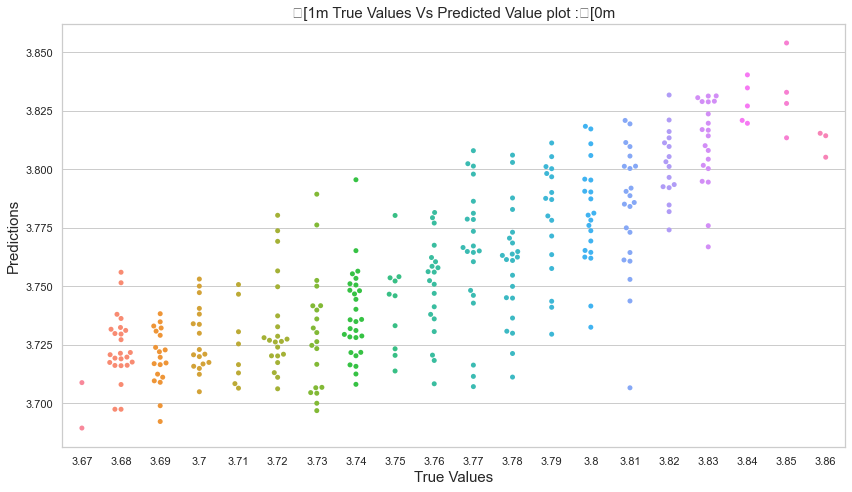

In [94]:
# Make predictions on the test data using the final model
y_pred_final = final_model.predict(X_votes_test)

# Create a scatter plot of True Values vs Predicted Values
plt.figure(figsize=(12, 7))
sns.swarmplot(y_votes_test.round(2), y_pred_final)
plt.title('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()

# Saving model

In [95]:
import joblib

# Save the final model to a file
model_filename = 'final_model_gross_collection.pkl'
joblib.dump(final_model, model_filename)

print(f"Final model saved as {model_filename}")


Final model saved as final_model_gross_collection.pkl


# Predicting the Final Model

In [96]:
# Use the final model to make predictions on X_votes_test
prediction = final_model.predict(X_votes_test)

# Convert y_votes_test to a numpy array
actual = np.array(y_votes_test)

# Create a DataFrame with predicted and actual values
data_Pred = pd.DataFrame({
    "Predicted Values": prediction,
    "Actual Values": actual
})

# Display the first few rows of the DataFrame
print(data_Pred.head())


   Predicted Values  Actual Values
0          3.778523       3.766166
1          3.774077       3.820502
2          3.765296       3.797815
3          3.767521       3.762894
4          3.747281       3.698903
